## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.

# 1. Analysis


Throughout the semester, we have had the pleasure to work with different datasets from various subject areas. What all of them had in common is that 1. they were prepared (to some degree) to be used with Machine Learning and 2. were containing data in subject areas, that we had little to no knowledge about.

For this assignment, we have decided, that we would want to experience working with the data and creating the models in a subject area, where we have at least some expertise. We could theoretically try to make it interdisciplinary, i.e. choose a topic and find ourselves a domain expert, but we deemed it not as interesting, as choosing a topic that is within our interests.

In this case, the subject area the we chose is **cars** and, to be more precise, our goal is to obtain a dataset of recent listings for new and used cars and create models, that will estimate a price for a car based on provided data (supervised).

The performance metrics for these models will be primarily respective methods for measuring the effectiveness of a created model using the accuracy score.

# 3. Data exploration

### 3.1 Column description

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option("display.max_columns", None)
data = pd.read_csv("listings_20241211_182556_com.csv")
data_size = len(data)
display(data)

C:\Users\Test\AppData\Local\Temp\ipykernel_5096\3545749173.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("listings_20241211_182556_com.csv")


price    priceType sellerType      make    model  \
0      269.000 kr.  Kontantpris    Private     Tesla  Model 3   
1      375.000 kr.  Kontantpris    Private      MINI   Cooper   
2      259.900 kr.  Kontantpris     Dealer        VW     ID.5   
3       38.000 kr.  Kontantpris    Private      Ford       Ka   
4      177.900 kr.  Kontantpris    Private     Tesla  Model S   
...            ...          ...        ...       ...      ...   
16950  398.000 kr.  Kontantpris    Private      Audi       Q5   
16951   89.900 kr.  Kontantpris     Dealer   Renault   Espace   
16952  249.900 kr.  Kontantpris     Dealer       BMW     520d   
16953  289.900 kr.  Kontantpris     Dealer     Volvo      V60   
16954  699.900 kr.  Kontantpris     Dealer  Mercedes   V220 d   

                                 variant  modelYear  ratingAvg  ratingAmount  \
0                     Performance AWD 4d       2021   4.749922        1713.0   
1        1,5 Essential Cabriolet aut. 2d       2024   4.366341         590.0   
2                     Pro Performance 5d       2022   4.336538          26.0   
3                           1,2 Trend 3d       2012   3.993825        1090.0   
4                                 85D 5d       2015   4.792932         995.0   
...                                  ...        ...        ...           ...   
16950  50 TFSi e S-line quattro S-tr. 5d       2021   4.433610         308.0   
16951                 1,6 dCi 130 Zen 5d       2015   3.970792         142.0   
16952      2,0 Touring Connected aut. 5d       2018   4.612502         999.0   
16953     2,0 D4 190 Inscription aut. 5d       2019   4.563180         455.0   
16954                2,0 Marco Polo aut.       2022   4.605769          18.0   

       ratingDriving  ratingUpkeepCosts  ratingSafety  ratingValueForMoney  \
0           4.751829           4.818993      4.812271             4.616597   
1           4.729817           4.019587      4.314875             4.401087   
2           4.576923           4.230769      4.500000             4.038462   
3           4.075676           4.193313      3.527372             4.178941   
4           4.840244           4.743401      4.894543             4.693538   
...              ...                ...           ...                  ...   
16950       4.696721           3.813417      4.779626             4.444676   
16951       4.357143           3.264045      4.156425             4.105556   
16952       4.825858           4.199867      4.841895             4.582388   
16953       4.642202           4.162826      4.910769             4.536923   
16954       4.615385           4.230769      4.846154             4.730769   

       kilometers               fuelType          range batteryCap  \
0       49.000 km                     El  (WLTP) 567 km   82,0 kWh   
1        5.000 km                 Benzin            NaN        NaN   
2       64.000 km                     El  (WLTP) 514 km   76,6 kWh   
3       87.000 km                 Benzin            NaN        NaN   
4      159.000 km                     El  (NEDC) 528 km   85,0 kWh   
...           ...                    ...            ...        ...   
16950   45.000 km  Plug-in hybrid Benzin   (WLTP) 61 km   12,3 kWh   
16951  271.000 km                 Diesel            NaN        NaN   
16952  182.000 km                 Diesel            NaN        NaN   
16953  116.000 km                 Diesel            NaN        NaN   
16954   43.000 km                 Diesel            NaN        NaN   

      energyUsage          fuelCons chargeHomeAC chargeQuickDC charge1080DC  \
0       165 Wh/km               NaN            -             -            -   
1             NaN  (NEDC) 20,2 km/l          NaN           NaN          NaN   
2       170 Wh/km               NaN            -             -            -   
3             NaN  (NEDC) 20,4 km/l          NaN           NaN          NaN   
4               -               NaN            -             -            -   
...           ...  

In [3]:
# Table summarizing of the dataset columns and values
summary = pd.DataFrame({
    "Feature name": data.columns,
    "Data type": data.dtypes,
    "Non-null values count": data.notnull().sum(),
    "Missing values count": data.isnull().sum() + data.isin(['-']).sum(),
    "Missing values %": ((data.isnull().sum() + data.isin(['-']).sum()) / len(data)) * 100,
    "Unique values count": data.nunique()
})

display(summary)

Feature name Data type  Non-null values count  \
price                              price    object                  16955   
priceType                      priceType    object                  16955   
sellerType                    sellerType    object                  16955   
make                                make    object                  16955   
model                              model    object                  16955   
variant                          variant    object                  16955   
modelYear                      modelYear     int64                  16955   
ratingAvg                      ratingAvg   float64                  16061   
ratingAmount                ratingAmount   float64                  16061   
ratingDriving              ratingDriving   float64                  16060   
ratingUpkeepCosts      ratingUpkeepCosts   float64                  16060   
ratingSafety                ratingSafety   float64                  16060   
ratingValueForMoney  ratingValueForMoney   float64                  16060   
kilometers                    kilometers    object                  16955   
fuelType                        fuelType    object                  16955   
range                              range    object                   7686   
batteryCap                    batteryCap    object                   7686   
energyUsage                  energyUsage    object                   7686   
fuelCons                        fuelCons    object                  10923   
chargeHomeAC                chargeHomeAC    object                   7475   
chargeQuickDC              chargeQuickDC    object                   7475   
charge1080DC                charge1080DC    object                   7475   
yearlyTax                      yearlyTax    object                  16955   
hp                                    hp    object                  16871   
torque                            torque    object                  16871   
acc0100                          acc0100    object                  16955   
topSpeed                        topSpeed    object                  16955   
gearbox                          gearbox    object                  10923   
gearsAmount                  gearsAmount    object                  10923   
towWeight                      towWeight    object                  16955   
color                              color    object                  16955   
newPrice                        newPrice   float64                      0   
category                        category    object                  16955   
type                                type    object                  16955   
trunkSpace                    trunkSpace    object                  16955   
weight                            weight    object                  16955   
width                              width    object                  16955   
length                            length    object                  16955   
height                            height    object                  16955   
loadWeight                    loadWeight    object                  16955   
maxTrailerWBrakes      maxTrailerWBrakes    object                  16955   
wheelsDriven                wheelsDriven    object                  16955   
cylinders                      cylinders    object                  10923   
abs                                  abs      bool                  16955   
esp                                  esp      bool                  16955   
airbags                          airbags    object                  16955   
fuelTankCap                  fuelTankCap    object                  10923   
doors                              doors    object                  16955   
equipment                      equipment    object                  16811   

                     Missing values count  Missing values %  \
price                                   0          0.000000   
priceType                               0          

### 3.2 Initial data clean-up

#### 3.2.1 Drop unnecessary columns

In [4]:
# Drop duplicates and unnecessary columns right from the start
data = data.drop_duplicates()
data = data.drop(['chargeHomeAC', 'chargeQuickDC', 'charge1080DC', 'color', 'newPrice', 'priceType', 'towWeight', 'category', 'trunkSpace', 'maxTrailerWBrakes', 'airbags', 'equipment'], axis=1)

#### 3.2.2 Extract numerical values

In [5]:
# Method definition for extracting and replacing values in features to f.ex. drop units
def extract_price(price):
    if isinstance(price, str) and len(price) > 3:
        try:
            return float(price[:-3].replace(".", ""))
        except (ValueError, IndexError) as e:
            print(e)
            return None
    return None

def extract_engineCC(variant):
    if not isinstance(variant, str):
        return None

    engine_cc_matches = pd.Series(variant).str.findall(r'[0-9],[0-9]').iloc[0]
    
    if engine_cc_matches:
        total_cc = int(engine_cc_matches[0].replace(",", "")) * 100
        return int(engine_cc_matches[0].replace(",", "")) * 100 if total_cc > 0 else None

    return None

def extract_kilometers(km_value):
    if not isinstance(km_value, str):
        return None
    
    km_value = km_value.replace("(ny bil)", "").strip()

    if len(km_value) > 1:
        return int(km_value[:-3].replace(".", ""))
    
    return 0

def extract_range(range):
    if not isinstance(range, str):
        return None
    
    if len(range) > 3:
        return int(range[6:-3].replace(".", ""))
    return None

def extract_batteryCap(battery_cap):    
    if len(str(battery_cap['batteryCap'])) > 3:
        return float(battery_cap['batteryCap'][:-4].replace(",","."))
    else:
        if battery_cap['fuelType'] != 'El':
            return 0
    return None

def extract_energyUsage(energy_usage):
    if len(str(energy_usage['energyUsage'])) > 3:
        return float(energy_usage['energyUsage'].split(' ')[0])
    else:
        if energy_usage['fuelType'] != 'El':
            return 0
    return None

def extract_fuel_cons(fuel_cons):
    if fuel_cons['fuelType'] == 'El':
            return 0
    elif len(str(fuel_cons['fuelCons'])) > 3:
        fuel_cons_calc = float(fuel_cons['fuelCons'].split(' ')[1].replace(",","."))
        if fuel_cons_calc > 100:
            fuel_cons_calc = fuel_cons_calc/10
        return fuel_cons_calc
    else:
        return None

def extract_yearly_tax(yearly_tax):
    if isinstance(yearly_tax, str) and len(yearly_tax) > 4:
        try:
            return float(yearly_tax.split(' ')[0].replace(".",""))
        except (ValueError, IndexError) as e:
            return None
    return None

def extract_hp(hp):
    if isinstance(hp, str) and len(hp) > 2:
        try:
            return float(hp.split(' ')[0].replace(".",""))
        except (ValueError, IndexError) as e:
            return None
    return None

def extract_acc(acc):
    if isinstance(acc, str) and len(acc) > 2:
        try:
            return float(acc.split(' ')[0].replace(".","").replace(",","."))
        except (ValueError, IndexError) as e:
            return None
    return None

def extract_abs_esp(abs_esp):
    if isinstance(abs_esp, bool):
        try:
            return int(bool(abs_esp))
        except (ValueError, IndexError) as e:
            return None
    return None

def extract_fuel_tank_cap(fuel_tank_cap):
    # Anything below 3 chars (i.e. '5 l') is not considered an actual value and will be dropped
    if len(str(fuel_tank_cap['fuelTankCap'])) > 3:
        return float(str(fuel_tank_cap['fuelTankCap'])[:-2])
    else:
        if fuel_tank_cap['fuelType'] == 'El':
            return 0
    return None

In [6]:
# Application of extraction and replacement methods
data['price'] = data['price'].apply(extract_price)
data['roundEngineCC'] = data['variant'].apply(extract_engineCC)
data['kilometers'] = data['kilometers'].apply(extract_kilometers)
data['range'] = data['range'].apply(extract_range)
data['batteryCap'] = data.apply(lambda row: extract_batteryCap(row), axis=1)
data['energyUsage'] = data.apply(lambda row: extract_energyUsage(row), axis=1)
data['fuelCons'] = data.apply(lambda row: extract_fuel_cons(row), axis=1)
data['yearlyTax'] = data['yearlyTax'].apply(extract_yearly_tax)
data['hp'] = data['hp'].apply(extract_hp)
data['torque'] = data['torque'].apply(extract_hp)
data['acc0100'] = data['acc0100'].apply(extract_acc)
data['topSpeed'] = data['topSpeed'].apply(extract_hp)
data['weight'] = data['weight'].apply(extract_acc)
data['width'] = data['width'].apply(extract_acc)
data['length'] = data['length'].apply(extract_acc)
data['height'] = data['height'].apply(extract_acc)
data['loadWeight'] = data['loadWeight'].apply(extract_acc)
data['abs'] = data['abs'].apply(extract_abs_esp)
data['esp'] = data['esp'].apply(extract_abs_esp)
data['fuelTankCap'] = data.apply(lambda row: extract_fuel_tank_cap(row), axis=1)

#### 3.3.3 Impute missing data

In [7]:
# Creatively impute NaNs - calculate range for cars, that are not el-driven
data["range"] = data.apply(
    lambda row: row["range"] + (row["fuelTankCap"] * row["fuelCons"])
    if not pd.isna(row["range"]) and not pd.isna(row["fuelTankCap"]) and not pd.isna(row["fuelCons"])
    else (row["fuelTankCap"] * row["fuelCons"]
          if pd.isna(row["range"]) and not pd.isna(row["fuelTankCap"]) and not pd.isna(row["fuelCons"])
          else row["range"]),
    axis=1,
)

#Impute gearbox type - techincally, even if single gear, electric cars utilize 
# the Automatic gearbox - thus all records will be imputed like so.
data["gearbox"] = data.apply(
    lambda row: "Automatisk" 
        if row['fuelType'] == 'El' and pd.isna(row['gearbox'])
        else row["gearbox"],
        axis=1
)

#Impute gears amount - in this set only electric cars have Nan for amountGears.
#Again, technically, all cars have gears, even if it is single forward gear.
#So we'll impute it to replace the Nan with 1 gear for electric cars.
#There is a special case, where Porsche Taycan with AWD has 2 forward gears.
#This renders a problem - in this dataset, cars with CVT are also labeled with 1 gear, which is
#technically incorrect - we'll label them as -1 instead.
def assign_gears(row):
    if pd.isna(row["gearsAmount"]):
        if row['make'] == 'Porsche' and row['model'] == 'Taycan' and row['wheelsDriven'] == 'Firehjulstræk':
            return 2
        elif row['fuelType'] == 'El':
            return 1
    elif 'CVT' in row['variant']:
            return -1
    else:
        return row["gearsAmount"]

data["gearsAmount"] = data.apply(
    lambda row: assign_gears(row),
        axis=1
)

data["cylinders"] = data.apply(
    lambda row: 
        0 if row['fuelType'] == 'El' and pd.isna(row['cylinders'])
        else row['cylinders'],
        axis=1
)

data["roundEngineCC"] = data.apply(
    lambda row: 
        0 if row['fuelType'] == 'El' and pd.isna(row['roundEngineCC'])
        else row['roundEngineCC'],
        axis=1
)

#### 3.3.4 Encode non-numerical data and drop NaNs (and impostor NaNs)

In [8]:
le_gearbox = LabelEncoder()
le_type = LabelEncoder()
le_makeModelVar = LabelEncoder()
le_sellerType = LabelEncoder()
le_fuelType = LabelEncoder()
le_wheelsDriven = LabelEncoder()

# Make + model + variant - hier. encoding
data['make_model_variant'] = data['make'] + ' ' + data['model'] + ' ' + data['variant']
data['make_model_variant'] = le_makeModelVar.fit_transform(data['make_model_variant'])

# Encode 'make', 'model', and 'variant' separately
make_encoder = LabelEncoder()
data['make'] = make_encoder.fit_transform(data['make'])

make_model_encoder = LabelEncoder()
data['model'] = make_model_encoder.fit_transform(data['model'])

make_model_variant_encoder = LabelEncoder()
data['variant'] = make_model_variant_encoder.fit_transform(data['variant'])

#Drop all NaNs and impostor NaNs (i.e. '-')
na_condition = (
    pd.isna(data['energyUsage']) | 
    pd.isna(data['wheelsDriven']) |
    pd.isna(data['batteryCap']) | 
    pd.isna(data['torque']) | 
    pd.isna(data['hp']) | 
    pd.isna(data['yearlyTax']) | 
    pd.isna(data['ratingAmount']) |
    pd.isna(data['ratingAvg']) | 
    pd.isna(data['ratingDriving']) | 
    pd.isna(data['ratingUpkeepCosts']) | 
    pd.isna(data['ratingSafety']) |  
    pd.isna(data['ratingValueForMoney']) |  
    pd.isna(data['range']) | 
    pd.isna(data['acc0100']) | 
    pd.isna(data['topSpeed']) | 
    pd.isna(data['weight']) | 
    pd.isna(data['width']) | 
    pd.isna(data['length']) | 
    pd.isna(data['height']) | 
    pd.isna(data['loadWeight']) | 
    pd.isna(data['type']) |
    pd.isna(data['cylinders']) |
    pd.isna(data['fuelTankCap']) |
    (data['cylinders'] == '-') |
    (data['wheelsDriven'] == '-') |
    (data['doors'] == '-')
)

data = data[~na_condition]

# Encode columns after dropping NA rows
data['sellerType'] = le_sellerType.fit_transform(data['sellerType'])
data['fuelType'] = le_fuelType.fit_transform(data['fuelType'])
data['wheelsDriven'] = le_wheelsDriven.fit_transform(data['wheelsDriven'])
data['type'] = le_type.fit_transform(data['type'])
data['gearbox'] = le_gearbox.fit_transform(data['gearbox'])

#### 3.3.5 Trace down last empty rows

In [9]:
invalid_rows = (
    data.isna().any(axis=1) |  # Check for NaN
    (data == '-').any(axis=1) |  # Check for '-'
    (data.astype(str) == 'NaN').any(axis=1)  # Check for 'NaN' as a string
)

rows_with_invalid_data = data[invalid_rows]
rows_with_invalid_data['decoded_mmv'] = le_makeModelVar.inverse_transform(rows_with_invalid_data['make_model_variant'].values) # To get better understanding as to why there are NaNs

display(rows_with_invalid_data)

C:\Users\Test\AppData\Local\Temp\ipykernel_5096\986793082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_invalid_data['decoded_mmv'] = le_makeModelVar.inverse_transform(rows_with_invalid_data['make_model_variant'].values) # To get better understanding as to why there are NaNs


price  sellerType  make  model  variant  modelYear  ratingAvg  \
102    420000.0           1     6    787     4857       2021   4.432290   
283    299900.0           0     6    202     4680       2020   4.449843   
368    450000.0           0     6    787     4912       2022   4.432290   
465    359900.0           0     6    206     4670       2020   4.376468   
728    297900.0           0     6    192     4476       2024   4.533733   
...         ...         ...   ...    ...      ...        ...        ...   
16846  599780.0           0     6    208     4859       2022   4.618591   
16940  410000.0           1     6    787     4861       2021   4.433610   
16943  449900.0           0     6    787     4863       2021   4.433610   
16948  464900.0           0     6    787     4861       2021   4.433610   
16950  398000.0           1     6    787     4863       2021   4.433610   

       ratingAmount  ratingDriving  ratingUpkeepCosts  ratingSafety  \
102           308.0       4.695473           3.812632      4.778706   
283          3439.0       4.664904           4.082609      4.599012   
368           308.0       4.695473           3.812632      4.778706   
465          3704.0       4.729341           3.590567      4.755050   
728           219.0       4.642857           4.439732      4.602679   
...             ...            ...                ...           ...   
16846          82.0       4.813559           4.217391      4.879310   
16940         308.0       4.696721           3.813417      4.779626   
16943         308.0       4.696721           3.813417      4.779626   
16948         308.0       4.696721           3.813417      4.779626   
16950         308.0       4.696721           3.813417      4.779626   

       ratingValueForMoney  kilometers  fuelType   range  batteryCap  \
102               4.442348       88000         5  1875.4        12.5   
283               4.452849       75000         0   860.0         0.0   
368               4.442348      109000         5  1679.0        12.3   
465               4.430914       99000         1  1781.2         0.0   
728               4.449664        7400         0   864.0         0.0   
...                    ...         ...       ...     ...         ...   
16846             4.564103       90000         5  1841.4        12.2   
16940             4.444676       72000         5  1683.4        12.2   
16943             4.444676       32000         5  1738.4        12.3   
16948             4.444676       60000         5  1684.4        17.9   
16950             4.444676       45000         5  1740.4        12.3   

       energyUsage  fuelCons  yearlyTax     hp  torque  acc0100  topSpeed  \
102          204.0      33.6     1020.0  299.0   450.0      6.1     239.0   
283            0.0      17.2     2780.0  190.0   320.0      6.2     236.0   
368          209.0      30.0      780.0  367.0   500.0      5.3     239.0   
465            0.0      24.4     4200.0  204.0   400.0      8.1     246.0   
728            0.0      21.6     1280.0  110.0   200.0     10.6     200.0   
...            ...       ...        ...    ...     ...      ...       ...   
16846        194.0      34.2      780.0  299.0   450.0      6.3     250.0   
16940        211.0      30.1      780.0  299.0   450.0      6.1     239.0   
16943        209.0      31.1      780.0  299.0   450.0      6.1     239.0   
16948        195.0      30.1      780.0  299.0   450.0      6.1     239.0   
16950        209.0      31.1     1080.0  299.0   450.0      6.1     239.0   

       gearbox gearsAmount  type  weight  width  length  height  loadWeight  \
102          0           7     8  2050.0  189.0   467.0   166.0       610.0   
283          0           7     4  1360.0  179.0   431.0   143.0       585.0   
368          0           7     8  2050.0  189.0   467.0   166.0       610.0   
465          0           7     9  1620.0  189.0   494.0   146.0       710.0   
728          0           7     4  1205.0  174.0   403.0   143.0       4

Audis approach to variant naming renders it impossible to extract the rounded engine's CC - they'll have to go.

In [10]:
missing_CC = pd.isna(data['roundEngineCC'])
data = data[~missing_CC]

# Identify remaining rows
invalid_rows = (
    data.isna().any(axis=1) |  # Check for NaN
    (data == '-').any(axis=1) |  # Check for '-'
    (data.astype(str) == 'NaN').any(axis=1)  # Check for 'NaN' as a string
)

rows_with_invalid_data = data[invalid_rows]
rows_with_invalid_data['decoded_mmv'] = le_makeModelVar.inverse_transform(rows_with_invalid_data['make_model_variant'].values) # To get better understanding as to why there are NaNs

display(rows_with_invalid_data)

C:\Users\Test\AppData\Local\Temp\ipykernel_5096\3761720974.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_invalid_data['decoded_mmv'] = le_makeModelVar.inverse_transform(rows_with_invalid_data['make_model_variant'].values) # To get better understanding as to why there are NaNs


price  sellerType  make  model  variant  modelYear  ratingAvg  \
4064    489800.0           0    56    992     1951       2023   4.068227   
5977   2750000.0           0    28    333     3710       2024   4.184784   
12032   619900.0           0    30    864     2359       2025   4.029567   
12395   419900.0           0    74    801     3989       2024   4.218610   
12545   469900.0           0    28    333     3710       2024   4.184784   
12700   419000.0           0    56    792     1145       2024   4.262302   
12975   409900.0           0    56    792     1145       2024   4.262302   
13280   509900.0           0    74    801     4022       2024   4.218610   
13426   469900.0           0    28    333     3710       2024   4.184784   
13481   399900.0           0    74    801     3988       2024   4.218610   
13802   645995.0           0    30    864     2359       2025   4.032374   
14505   399900.0           0    56    792     1145       2024   4.262302   
16066   799900.0           0    49    560     2848       2023   4.555556   
16222   764900.0           0    49    560     2848       2023   4.555556   

       ratingAmount  ratingDriving  ratingUpkeepCosts  ratingSafety  \
4064          225.0       4.262500           3.605016      4.320755   
5977          511.0       4.397039           3.541384      4.519674   
12032         199.0       4.442748           3.296443      4.418605   
12395         920.0       4.426392           3.722308      4.461894   
12545         511.0       4.397039           3.541384      4.519674   
12700         755.0       4.270521           4.000000      4.480922   
12975         755.0       4.270521           4.000000      4.480922   
13280         920.0       4.426392           3.722308      4.461894   
13426         511.0       4.397039           3.541384      4.519674   
13481         920.0       4.426392           3.722308      4.461894   
13802         200.0       4.444867           3.299213      4.420849   
14505         755.0       4.270521           4.000000      4.480922   
16066           9.0       4.666667           4.222222      4.666667   
16222           9.0       4.666667           4.222222      4.666667   

       ratingValueForMoney  kilometers  fuelType   range  batteryCap  \
4064              4.084639        7500         3  1039.5         0.0   
5977              4.281037      500000         5    82.0        12.7   
12032             3.960474        4000         5    54.0        13.8   
12395             4.263846       18105         3  1166.0         0.0   
12545             4.281037       19000         5  2356.8        12.7   
12700             4.297765         500         0   858.0         0.0   
12975             4.297765       11000         0  1039.5         0.0   
13280             4.263846        6500         5  5575.0        18.1   
13426             4.281037        8000         5  2388.8        17.7   
13481             4.263846       11000         3  1166.0         0.0   
13802             3.964567           0         5    54.0        10.4   
14505             4.297765        2000         0  1039.5         0.0   
16066             4.666667       26900         6   127.0        27.8   
16222             4.666667       10700         6   127.0        27.8   

       energyUsage  fuelCons  yearlyTax     hp  torque  acc0100  topSpeed  \
4064           0.0      18.9     1360.0  210.0   525.0      7.0     180.0   
5977         155.0       NaN      780.0  215.0   315.0      9.4     195.0   
12032        192.0       NaN      780.0  253.0   367.0      9.3     180.0   
12395          0.0      21.2     1280.0  218.0   270.0      8.1     180.0   
12545        155.0      48.4      780.0  215.0   315.0      9.4     195.0   
12700          0.0      15.6     1360.0  158.0   270.0      9.2     199.0   
12975          0.0      18.9     1360.0  158.0   270.0      9.2     199.0   
13280          0.0     100.0      780.0  306.0   510.0      6.0     180.0   
13426        155.0      48.4  

The remaining cars did not have gears amount or fuel consumption defined in their specification - they'll have to dropped as well.

In [11]:
missing_CC = pd.isna(data['fuelCons']) | (data['gearsAmount'] == '-')
data = data[~missing_CC]

invalid_rows = (
    data.isna().any(axis=1) |  # Check for NaN
    (data == '-').any(axis=1) |  # Check for '-'
    (data.astype(str) == 'NaN').any(axis=1)  # Check for 'NaN' as a string
)

rows_with_invalid_data = data[invalid_rows]
rows_with_invalid_data['decoded_mmv'] = le_makeModelVar.inverse_transform(rows_with_invalid_data['make_model_variant'].values) # To get better understanding as to why there are NaNs

display(rows_with_invalid_data)

Empty DataFrame
Columns: [price, sellerType, make, model, variant, modelYear, ratingAvg, ratingAmount, ratingDriving, ratingUpkeepCosts, ratingSafety, ratingValueForMoney, kilometers, fuelType, range, batteryCap, energyUsage, fuelCons, yearlyTax, hp, torque, acc0100, topSpeed, gearbox, gearsAmount, type, weight, width, length, height, loadWeight, wheelsDriven, cylinders, abs, esp, fuelTankCap, doors, roundEngineCC, make_model_variant, decoded_mmv]
Index: []

#### 3.3.6 Identifying outliers
This dataset is simply data scraped of the website, with details filled out by people, meaning that it is prone to typos and other mistakes. This section goes through identifying the records containing mistakes and removing them.

The first logical step would be to find 'extreme' cars, i.e. those severly over- or underpriced or with an abstract mileage, however, it is difficult to have a clear judgment on them, as there are aspects that could influence those aspects, like car's history and owner/-s. Due this, we will remove only those listings, that are simply impossible (with clear judgment and not based on opinion).

In [12]:
# Find top 50 cars with highest top speed
top50range = data.sort_values(by='range', ascending=False).head(50)
top50range['decoded_mmv'] = le_makeModelVar.inverse_transform(top50range['make_model_variant'].values) # To get better understanding as to why there are NaNs

display(top50range)

price  sellerType  make  model  variant  modelYear  ratingAvg  \
15270   900000.0           0    77   1004     3278       2023   4.352540   
15271   819700.0           0    77   1004     3273       2022   4.352540   
15342   599900.0           0    77   1002     3254       2023   4.510746   
13805   733679.0           0    77   1002     3249       2025   4.510746   
13672  1419000.0           0    61    354     4213       2024   4.226434   
14859   829800.0           0     8    998     4379       2022   4.327574   
14855   440000.0           0     8    998     4379       2021   4.327574   
16861   400000.0           0     8    998     4379       2021   4.327574   
15487   295000.0           0    49    450     3723       2023   4.729055   
13671  1429000.0           0    61    354     4215       2024   4.226434   
13652  1549000.0           0    61    354     4215       2024   4.226434   
14689  1599000.0           0    61    354     4213       2024   4.226434   
12926  1549000.0           0    61    354     4213       2024   4.226434   
8495   1699000.0           0    61    356     4215       2024   4.219512   
6708    349900.0           0    76    235     1467       2021   4.553571   
14407   229900.0           0    36   1005     2350       2024   4.555921   
5631    249800.0           0    76    763     1215       2021   4.307947   
15052   439880.0           0    48    337     4010       2022   3.333333   
5456    474800.0           0    48    337     4002       2023   3.333333   
14949   359500.0           1    48    337     4005       2022   3.333333   
14969   469900.0           0    48    337     4011       2023   3.333333   
16434   556900.0           0    48    337     4004       2024   3.333333   
16428   499900.0           0    48    337     4011       2022   3.333333   
15093   419900.0           0    48    337     4005       2022   3.333333   
13706   529880.0           0    48    337     4004       2024   3.333333   
10701   479900.0           0    76    929     1956       2024   4.472500   
11022   269900.0           0    76    763     1211       2021   4.308013   
5253    249900.0           0    57    236     2342       2023   4.025739   
13077  1399900.0           0    61    354     4213       2024   4.226434   
5140    369900.0           0    36    888     2366       2023   4.022033   
3710    369900.0           0    36    888     2366       2023   4.022033   
11356   349990.0           0    17    666     1472       2023   4.379310   
9224    344900.0           0    30    956     2338       2024   4.141147   
8499    339800.0           0    30    956     2338       2022   4.141147   
3973    319900.0           0    30    956     2338       2022   4.141147   
5174    905000.0           0    61    354     4214       2022   4.226434   
4204    204900.0           0     6    202     1452       2020   4.449606   
1663    369900.0           0    76    235     1467       2021   4.553571   
8021    379800.0           0    76    235     1467       2021   4.553571   
1581    369800.0           0    76    235     1467       2022   4.553571   
926     349900.0           0    76    235     1467       2021   4.553571   
4934    199900.0           0    36   1005     2354       2022   4.555921   
4930    197500.0           0    36   1005     2350       2022   4.555921   
992     184800.0           0    36    737     2336       2020   4.442130   
8886    319900.0           0    15    305     2311       2022   5.000000   
15016   509900.0           0    48    337     4004       2023   3.333333   
5996    459800.0           0    48    337     4004       2023   3.333333   
4494    499900.0           0    48    337     4004       2022   3.333333   
15087   529900.0           0    48    337     4010       2023   3.333333   
320     199700.0           0    66    666     1461       2021   4.419747   

       ratingAmount  ratingDriving  ratingUpkeepCosts  ratingSafety  \
15270         367.0       4.650000           3.405745      4.92

Significant portion of hybrid cars have insane range after the impute due to unrealistic fuel consumption, which results in a situation, where supposedly Volvo XC90 2,0 T8 ReCharge Ultimate Dark is capable of driving from VIA UC building in Horsens to Dogharoun Border crossing between Iran and Afganistan on a single tank of fuel with safe margin of 355,1 km [(source)](https://www.google.com/maps/dir/Baneg%C3%A5rdsgade+2,+Horsens/Dogharoun+Border,+A1,+Afganistan/@44.8165786,24.6013577,5z/data=!3m1!4b1!4m14!4m13!1m5!1m1!1s0x464c63432c3c5fe5:0xa6a88ddb851ad606!2m2!1d9.8375268!2d55.863533!1m5!1m1!1s0x3f16148c6aaaaaab:0xaa8f1ed3729058e7!2m2!1d60.9932889!2d34.71289!3e0?entry=ttu&g_ep=EgoyMDI0MTIxMS4wIKXMDSoASAFQAw%3D%3D).

Due this, we'll need to handle those outliers by simply applying the reported fuel usage found on the internet from reputable sources, using following as a rule:
- Avg. Hybrid SUV consumption: 13,3 km/l
- Avg. Hybrid St. car and Sedan consumption: 17 km/l
- Avg. Hybrid Halvkombi consumption: 20 km/l
- Avg. Hybrid CUV consumption: 18.8 km/l
1. If fuel consumption for a hybrid vehicle is above the average for given body type, we'll assume it is an outlier
2. Replaced claimed fuel consumption with the more realistic one
3. Estimate the new range by first substracting the calculated (to get the original, electric-motor-only range) and then calculating the new one with more realistic fuel consumption.

In [13]:
# Define realistic thresholds
REALISTIC_FUEL_CONSUMPTION_HYBRID_SUV = 13.3  # km/L
REALISTIC_FUEL_CONSUMPTION_HYBRID_ST_SEDAN = 17  # km/L
REALISTIC_FUEL_CONSUMPTION_HYBRID_HALVKOMBI = 20  # km/L
REALISTIC_FUEL_CONSUMPTION_HYBRID_CUV = 18.8  # km/L

def handle_unrealistic_values(row):
    if row['fuelType'] not in [0,1,2]:
        if row['type'] == 8:
            if row['fuelCons'] > REALISTIC_FUEL_CONSUMPTION_HYBRID_SUV:
                prevFC = row['fuelCons']
                row['fuelCons'] = REALISTIC_FUEL_CONSUMPTION_HYBRID_SUV

                row['range'] = row['range'] - (prevFC * row['fuelTankCap'])
                row['range'] = row['range'] + row['fuelCons'] * row['fuelTankCap']
        elif row['type'] == 10 or row['type'] == 9:
            if row['fuelCons'] > REALISTIC_FUEL_CONSUMPTION_HYBRID_ST_SEDAN:
                prevFC = row['fuelCons']
                row['fuelCons'] = REALISTIC_FUEL_CONSUMPTION_HYBRID_ST_SEDAN

                row['range'] = row['range'] - (prevFC * row['fuelTankCap'])
                row['range'] = row['range'] + row['fuelCons'] * row['fuelTankCap']
        elif row['type'] == 4:
            if row['fuelCons'] > REALISTIC_FUEL_CONSUMPTION_HYBRID_HALVKOMBI:
                prevFC = row['fuelCons']
                row['fuelCons'] = REALISTIC_FUEL_CONSUMPTION_HYBRID_HALVKOMBI

                row['range'] = row['range'] - (prevFC * row['fuelTankCap'])
                row['range'] = row['range'] + row['fuelCons'] * row['fuelTankCap']
        elif row['type'] == 1:
            if row['fuelCons'] > REALISTIC_FUEL_CONSUMPTION_HYBRID_CUV:
                prevFC = row['fuelCons']
                row['fuelCons'] = REALISTIC_FUEL_CONSUMPTION_HYBRID_CUV

                row['range'] = row['range'] - (prevFC * row['fuelTankCap'])
                row['range'] = row['range'] + row['fuelCons'] * row['fuelTankCap']
        return row['range']
    else:
        return row['range']

# Apply the function to correct or estimate ranges
data['range'] = data.apply(lambda row: handle_unrealistic_values(row), axis=1)
top50range = data.sort_values(by='range', ascending=False).head(50)
top50range['decoded_mmv'] = le_makeModelVar.inverse_transform(top50range['make_model_variant'].values)
display(top50range)

price  sellerType  make  model  variant  modelYear  ratingAvg  \
9186   304800.0           0    36    888     2407       2022   4.022033   
11465  229900.0           0    68    900     3447       2020   4.599525   
8553   239900.0           0    26    526      159       2022   4.268109   
16512  269900.0           0    68    900     3476       2021   4.599525   
16031  250000.0           0    68    900     3400       2020   4.599525   
316     79900.0           0    57    635     2113       2016   4.248530   
420    269900.0           0     8    119     3204       2020   4.612227   
11532   59800.0           0    15    295     2051       2015   4.181057   
7704    59700.0           0    15    295     2036       2016   4.181057   
4107    89900.0           0    15    295     2026       2017   4.687500   
1680    69900.0           0    15    295     2026       2018   4.181057   
7905    49700.0           0    15    295     2038       2017   4.181057   
260     43800.0           0    15    295     2026       2016   4.181057   
1073    59500.0           1    15    295     2040       2018   4.181057   
16084  260000.0           1    68    900     3476       2020   4.599525   
7607   139900.0           0    76    763     3425       2019   4.308013   
9589   259900.0           0    76    763     3403       2020   4.308013   
880     49900.0           0    57    635     2919       2014   4.248530   
1826    59900.0           0    57    635     2920       2015   4.248530   
6881   169900.0           0    26    526      155       2020   4.268109   
16021  199900.0           0    76    763     3404       2020   4.308013   
509    229900.0           0    76    763     3404       2020   4.307900   
16369  249870.0           0    76    763     3428       2021   4.308013   
16358  279999.0           1    76    763     3428       2020   4.308013   
15894  230100.0           0    76    763     3403       2020   4.308013   
15933  122910.0           0    76    763     3427       2020   4.308013   
15924  214900.0           0    76    763     3428       2020   4.308013   
16563  217000.0           0    76    763     3428       2020   4.308064   
3167   234999.0           0     6    206     3565       2016   4.376468   
4127   309900.0           0     6    206     3565       2017   4.376468   
10924  189900.0           0    49    280     2874       2018   4.690515   
5912    32900.0           0    62    714     1888       2013   4.362376   
7745    74550.0           1    59     60     2083       2015   4.281678   
950     79900.0           0    59     60     2085       2016   4.281678   
2098    67400.0           1    59     60     2083       2015   4.281678   
15890  299900.0           0     8    119     3204       2017   4.612152   
5379   239400.0           0     8    119     3683       2017   4.612152   
16242  139999.0           0     8    119     3683       2015   4.612152   
6478   285000.0           1     8    119     3204       2017   4.612152   
3930   319000.0           0    18    417     1572       2019   4.750000   
16533  224800.0           0     6    206     4279       2017   4.376582   
5205   299400.0           0     6    206     4278       2016   4.376468   
15952  134900.0           0    26    824     3317       2016   4.267060   
15572  189000.0           0     8    154     4360       2017   4.625000   
15800  375000.0           0     8    119     3660       2020   4.612152   
8765   219900.0           0    76    763     3439       2019   4.307947   
15841  209900.0           0     8    119     3686       2018   4.612152   
16346  339500.0           0     8    119     3660       2020   4.612152   
16012  279700.0           0     8    119     3686       2018   4.612152   
2161   249749.0           0    76    763     3421       2019   4.307900   

       ratingAmount  ratingDriving  ratingUpkeepCosts  ratingSafety  \
9186          148.0       4.334951           3.356098      4.401961   
11465         888.0       4.641243        

Second problem, visible in the table for solving the fuel consumption, is that some cars have unrealistic fuel tank capacities, also affecting the range.

In [14]:
top50tank = data.sort_values(by='fuelTankCap', ascending=False)
top50tank = top50tank[top50tank['fuelTankCap'] < 83]
top50tank['decoded_mmv'] = le_makeModelVar.inverse_transform(top50tank['make_model_variant'].values) # To get better understanding as to why there are NaNs
display(top50tank.head(50))

price  sellerType  make  model  variant  modelYear  ratingAvg  \
8553    239900.0           0    26    526      159       2022   4.268109   
5908    119900.0           0    38    813     4072       2007   4.187239   
11729   499995.0           0    38    424     4256       2016   4.245017   
6881    169900.0           0    26    526      155       2020   4.268109   
15365   164000.0           0     6    209     4297       2015   4.365044   
16371   283400.0           0    33    991     4454       2018   4.041667   
3150    269900.0           0    38    424     4265       2010   4.245017   
15295   310000.0           0     6    843     4552       2016   4.235755   
14614   129900.0           0    38    813     4072       2005   4.187239   
16682   259000.0           1     8    164     4611       2008   4.201122   
3589    499000.0           0     6    209     4297       2015   4.365044   
15756   229700.0           0     8    164     4601       2010   4.201122   
15753    54900.0           0    49    453     4155       2011   4.619469   
15741   239900.0           0    49    329     4164       2013   4.578707   
15739   199900.0           0    49    329     4164       2012   4.578707   
7453    124800.0           0    49    327     4190       2009   4.750000   
4276    329400.0           0    49    329     4147       2013   4.578707   
3716    450000.0           0    46    794     4465       2017   4.102941   
3650    119400.0           0    49    329     4148       2014   4.578707   
3928    300000.0           0    76    349     3367       2015   4.077420   
3898    300000.0           0    76    349     3372       2014   4.077420   
15625   249700.0           0    49    453     4137       2014   4.619469   
7500    229000.0           1     8    155     4360       2012   4.618623   
7642    497600.0           0    61    756     4099       2017   4.450000   
15658   199800.0           0    49    453     4137       2013   4.619469   
15666   285000.0           1    49    835     4634       2014   4.409729   
15669   209000.0           1    49    835     4626       2015   4.409729   
5164    178900.0           0    49    452     4393       2004   4.462453   
5004    300000.0           0    76    349     3371       2015   4.077420   
14665  1262500.0           0     8    998     4234       2019   4.327574   
14696   370000.0           1    38    813     4266       2015   4.187239   
16653   469000.0           1     8    680     4611       2012   4.304437   
14720  1599900.0           0     8   1000     4236       2020   4.250000   
14723   142000.0           0    38    813     4265       2016   4.187239   
3079   1449900.0           0     6    799     4753       2012   4.297619   
5623    199999.0           0     8    155     4261       2009   4.618623   
5330    869000.0           0    61    756     4098       2017   4.450000   
16691   189000.0           0     6    838     4573       1995   4.192849   
3197    400000.0           0    76    730     3378       2014   4.189917   
14737  1079900.0           0     8    998     4235       2018   4.327574   
16332   239000.0           1     8    680     4611       2012   4.304437   
10647   419800.0           0    49    835     4625       2016   4.408699   
5008    299900.0           0    76    730     3512       2010   4.189917   
10976   219800.0           0    49    453     4419       2010   4.619469   
4784    659900.0           0     8    998     4365       2018   4.327574   
4772    595000.0           0     6    799     4753       2010   4.297619   
14767  1499900.0           0     8    998     4234       2019   4.327574   
5730    449900.0           0    49    848     4764       2003   4.270022   
16704   299900.0           0    49    835     4626       2016   4.409729   
5419     49900.0           0    49    447     4080       1998   4.463789   

       ratingAmount  ratingDriving  ratingUpkeepCosts  ratingSafety  \
8553         2746.0       4.435967           4.030508      4.33

In [15]:
# Most of the cars seem okay - we'll replace tank cap only on the Focus
# This is performed under the assumption, that the car has not been modified
def handle_focus_fuel_tank(row):
    if row['make'] == 26 and row['model'] == 526 and row['fuelTankCap'] > 60:
        row['fuelTankCap'] = 55
    return row['fuelTankCap']
    
data['fuelTankCap'] = data.apply(lambda row: handle_focus_fuel_tank(row), axis=1)

Lastly, we'll check if there are no instances, where range is 0.

In [16]:
bottom50range = data.sort_values(by='range', ascending=True)
bottom50range['decoded_mmv'] = le_makeModelVar.inverse_transform(bottom50range['make_model_variant'].values) # To get better understanding as to why there are NaNs
display(bottom50range.head(50))

price  sellerType  make  model  variant  modelYear  ratingAvg  \
3612   399900.0           0     6   1045     4840       2021   4.651471   
10825  359800.0           0     6   1045     4840       2021   4.653509   
9972   399900.0           0     6   1045     4840       2021   4.653509   
99      99500.0           0    69    530     5200       2020   4.215668   
11287   89500.0           0    69    530     5200       2020   4.215668   
5221    70000.0           0    69    531     5217       2018   4.166599   
3819    74900.0           0    69    528     5199       2019   4.083089   
11285  114500.0           0    69    530     5200       2021   4.215668   
8858   119900.0           0     8   1054     5173       2015   4.697064   
5550   109900.0           0     8   1054     5173       2016   4.697064   
10069  114900.0           0    69    530     5200       2021   4.215668   
7912    79500.0           0    69    530     5198       2021   4.215668   
6262    79900.0           0    69    530     5198       2021   4.215668   
8474   129900.0           0    76   1044     4935       2020   4.492278   
8585    94900.0           0    76   1044     5249       2018   4.492278   
9156   109900.0           0    76   1044     5398       2020   4.492278   
8597   111111.0           0    76   1044     5249       2018   4.492278   
4832   164900.0           0     8   1056     5173       2018   4.748612   
14076  469800.0           0     8   1057     5443       2024   4.901099   
4522    99500.0           0    62    957     5219       2021   4.074492   
7569    94800.0           0    24    117     5167       2022   4.480000   
7157    97800.0           0    24    117     5167       2022   4.480000   
830     94800.0           0    24    117     5167       2022   4.480000   
6571    95500.0           0    24    117     5167       2022   4.480000   
6543    98800.0           0    24    117     5167       2022   4.480000   
7834    95800.0           0    24    117     5167       2022   4.480000   
9015    99500.0           0    24    117     5167       2022   4.480000   
8497    95800.0           0    24    117     5167       2022   4.480000   
7420    89800.0           0    24    117     5167       2022   4.480000   
7432    96900.0           0    24    117     5167       2022   4.480000   
1976   104280.0           0    24    117     5167       2022   4.480000   
8637    99900.0           0    24    117     5167       2022   4.480000   
10547   97500.0           0    24    117     5167       2022   4.480000   
10577   97500.0           0    24    117     5167       2022   4.480000   
7449   104900.0           0    24    117     5167       2021   4.480000   
810     95800.0           0    24    117     5167       2022   4.480000   
154     99800.0           0    24    117     5167       2022   4.480000   
5698   129900.0           0    62    957     5219       2021   4.074492   
6703    94800.0           0    24    117     5167       2022   4.480000   
10568   97500.0           0    24    117     5167       2022   4.480000   
2710    95800.0           0    24    117     5167       2022   4.480000   
7407    95800.0           0    24    117     5167       2022   4.480000   
5031   109900.0           0    62    957     5219       2021   4.074492   
2033    94000.0           0    24    117     5167       2021   4.480000   
6451   109900.0           0    76   1037     4935       2017   4.770170   
3203   149700.0           0    24    117        0       2022   4.480000   
438    169900.0           0    24    117     5252       2023   4.480000   
637    134900.0           0    24    117     5257       2022   4.480000   
5418    99900.0           0    76   1037     4935       2016   4.770170   
11278  147500.0           0    24    117     5252       2023   4.480000   

       ratingAmount  ratingDriving  ratingUpkeepCosts  ratingSafety  \
3612          153.0       4.841176           4.335294      4.917647   
10825         154.0       4.842105        

In [17]:
# Luckily, there are only 3 instances where range is 0 - we'll just remove them
data.drop(data[data['range'] == 0].index, inplace=True)

Lastly, we'll check for the unrelistic values in loadWeight and remove them as well.

In [18]:
lasteevne = data.sort_values(by='loadWeight', ascending=True)
lasteevne['decoded_mmv'] = le_makeModelVar.inverse_transform(lasteevne['make_model_variant'].values) # To get better understanding as to why there are NaNs
display(lasteevne.head(50))

price  sellerType  make  model  variant  modelYear  ratingAvg  \
4850    180000.0           1    76    772     1835       2020   4.201205   
2673    229000.0           1    76    772     1835       2020   4.201205   
4086    209900.0           0    76    772     1835       2021   4.201205   
62       48900.0           0    13    746     3675       2012   4.153283   
4263    299900.0           0    24     14     1228       2018   4.416667   
8576    234900.0           0    24     14     1228       2016   4.416667   
10804   139900.0           0    66    631     1817       2018   4.216011   
9834     69900.0           0    66    719       90       2017   4.312452   
15535   259900.0           0     6    208     4333       2012   4.618591   
5901    479800.0           0    61    356     4576       2013   4.219512   
3079   1449900.0           0     6    799     4753       2012   4.297619   
4082    430000.0           1    41    512     2630       2006   3.875000   
2218    209900.0           0    59   1032     4827       2023   4.608333   
10292   157500.0           0    59   1032     4827       2021   4.608333   
2195    209900.0           0    59   1032     4822       2023   4.608333   
3484    199800.0           0    59   1032     4825       2021   4.608333   
7441    149900.0           0    59   1032     4798       2021   4.608333   
882     167900.0           0    59   1032     4822       2023   4.608333   
6623    169900.0           0    59   1032     4825       2021   4.608333   
8085    164800.0           0    59   1032     4822       2021   4.608333   
10192   169900.0           0    59   1032     4822       2022   4.608333   
9088    169500.0           0    59   1032     4798       2023   4.608333   
10252   159800.0           0    59   1032     4825       2021   4.608333   
3726    149900.0           0    59   1032     4792       2021   4.608333   
5697    174900.0           0    59   1032     4825       2022   4.608333   
6233    184900.0           0    59   1032     4822       2022   4.608333   
2746    144900.0           0    59   1032     4798       2021   4.608333   
10230   154900.0           0    59   1032     4798       2021   4.608333   
2416    154900.0           0    59   1032     4822       2021   4.608333   
2686    189900.0           0    59   1032     4827       2021   4.608333   
202     149900.0           0    59   1032     4798       2021   4.608333   
1622    184500.0           0    59   1032     4827       2021   4.608333   
8564    164500.0           0    59   1032     4797       2021   4.608333   
9219    159900.0           0    59   1032     4822       2022   4.608333   
170     149900.0           0    59   1032     4798       2021   4.608333   
2345    204900.0           0    59   1032     4822       2023   4.608333   
1670    199800.0           0    59   1032     4827       2022   4.608333   
7297     99900.0           0    26    824     3335       2017   4.267060   
15855   199900.0           1    26    824     3344       2017   4.267060   
16056   190000.0           1    26    824     3336       2018   4.267060   
15953   155600.0           1    26    824     3315       2016   4.267060   
16548   137900.0           0    26    824     3315       2018   4.267060   
6754    144999.0           0    59   1032     4796       2020   4.608333   
6548    159900.0           0    59   1032     4796       2023   4.608333   
8547    142800.0           0    59   1032     4796       2022   4.608333   
1730    184900.0           0    59   1032     4796       2023   4.608333   
9556    149900.0           0    59   1032     4796       2021   4.608333   
10502   149990.0           0    59   1032     4796       2021   4.608333   
1260    189990.0           0    59   1032     4796       2023   4.608333   
2985     74900.0           0    24    262     2634       2001   3.960227   

       ratingAmount  ratingDriving  ratingUpkeepCosts  ratingSafety  \
4850         8829.0       4.265634           4.219490      4.00

In [19]:
# Remove the load weight below 0
data.drop(data[data['loadWeight'] < 0].index, inplace=True)

#### 3.3.7 Summary

Data is succesfully cleaned - as a result

In [20]:
print(f"{data_size - len(data)} entries had to be dropped due to missing values, resulting in loss of {"%.2f" % (((data_size - len(data))/data_size)* 100)}% of original data, shrinking the data set from {data_size} entries to {len(data)} entries.")

3645 entries had to be dropped due to missing values, resulting in loss of 21.50% of original data, shrinking the data set from 16955 entries to 13310 entries.


### 3.4 Data visualization

In this section, we'll try to use statistics and graphs to get a better understanding of the data in the dataset.

#### 3.4.1 Count, mean and quantiles

In [21]:
display(data.describe(percentiles=[.25,.5,.75]))

price    sellerType          make         model       variant  \
count  1.331000e+04  13310.000000  13310.000000  13310.000000  13310.000000   
mean   2.499805e+05      0.063261     46.076484    585.483396   3194.422014   
std    1.985918e+05      0.243440     24.733017    307.077783   1793.538264   
min    1.000000e+02      0.000000      0.000000      2.000000      0.000000   
25%    1.249000e+05      0.000000     26.000000    337.000000   1538.250000   
50%    2.099000e+05      0.000000     49.000000    625.000000   3442.500000   
75%    3.348000e+05      0.000000     68.000000    814.000000   4995.000000   
max    5.499180e+06      1.000000     77.000000   1071.000000   5485.000000   

          modelYear     ratingAvg  ratingAmount  ratingDriving  \
count  13310.000000  13310.000000  13310.000000   13310.000000   
mean    2018.654846      4.433970    886.981668       4.540363   
std        5.076885      0.273045   1789.412585       0.327189   
min     1966.000000      2.000000      0.000000       1.000000   
25%     2016.000000      4.262302     46.000000       4.319583   
50%     2020.000000      4.432290    155.000000       4.609274   
75%     2023.000000      4.653509    787.000000       4.768707   
max     2025.000000      5.000000   9912.000000       5.000000   

       ratingUpkeepCosts  ratingSafety  ratingValueForMoney     kilometers  \
count       13310.000000  13310.000000         13310.000000   13310.000000   
mean            4.222917      4.542916             4.429684   92384.218332   
std             0.466077      0.397815             0.259730   87644.012933   
min             1.000000      2.000000             1.000000       0.000000   
25%             4.000000      4.331497             4.297765   17000.000000   
50%             4.246930      4.685358             4.441815   70000.000000   
75%             4.606061      4.849315             4.590278  145000.000000   
max             5.000000      5.000000             5.000000  667000.000000   

           fuelType         range    batteryCap   energyUsage      fuelCons  \
count  13310.000000  13310.000000  13310.000000  13310.000000  13310.000000   
mean       1.216228    848.565693     23.599624     65.601503     14.472736   
std        1.269988    338.175902     33.565814     84.004878     12.146960   
min        0.000000    129.000000      0.000000      0.000000      0.000000   
25%        0.000000    534.000000      0.000000      0.000000      0.000000   
50%        1.000000    864.000000      0.000000      0.000000     17.200000   
75%        2.000000   1078.225000     58.300000    159.000000     22.400000   
max        6.000000   2214.000000    400.000000    307.000000     93.100000   

          yearlyTax            hp        torque      acc0100      topSpeed  \
count  13310.000000  13310.000000  13310.000000  13310.00000  13310.000000   
mean    2568.352742    193.187829    333.972652      8.97595    192.320736   
std     2788.480981    100.442329    174.765993      2.77648     29.567356   
min      320.000000     45.000000     72.000000      2.70000    130.000000   
25%      780.000000    120.000000    220.000000      7.10000    168.000000   
50%     1180.000000    180.000000    310.000000      8.60000    188.000000   
75%     3680.000000    238.000000    400.000000     10.70000    210.000000   
max    27300.000000    650.000000   4000.000000    109.00000    330.000000   

            gearbox          type        weight         width        length  \
count  13310.000000  13310.000000  13310.000000  13310.000000  13310.000000   
mean       0.294741      5.382795   1612.664313    181.912472    445.173479   
std        0.455943      3.189988    424.875595      8.107304     39.837021   
min        0.000000      0.000000    770.000000     94.000000    161.000000   
25%        0.000000      4.000000   1275.250000    178.000000    425.000000   
50%        0.000000      5.000000   1587.000000    183.000000    453.000000   
75%        1.000000      8.000000   

#### 3.4.2 Boxplots

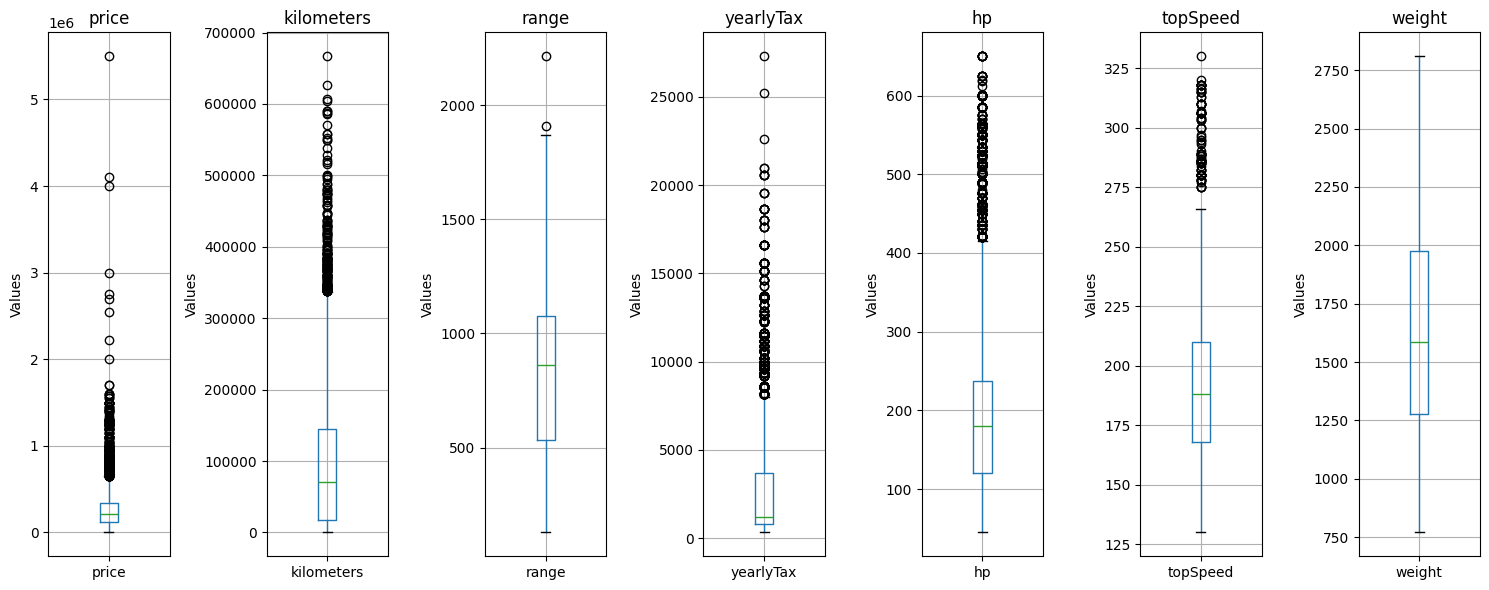

In [22]:
plot_columns = ['price', 'kilometers', 'range', 'yearlyTax', 'hp', 'topSpeed', 'weight']

fig, axes = plt.subplots(nrows=1, ncols=len(plot_columns), figsize=(15, 6))

for i, column in enumerate(plot_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel("Values")
    axes[i].set_xlabel("")
plt.tight_layout()
plt.show()

#### 3.4.3 Histogram(s)

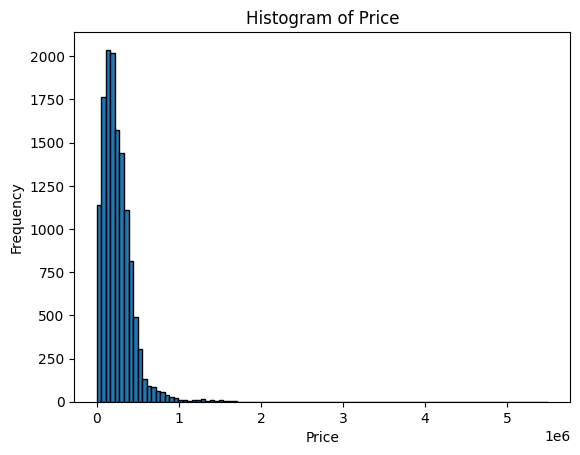

In [23]:
# Plot histogram for price
plt.hist(data['price'], bins=100, edgecolor='black')
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

It seems that in our dataset there is a significant amount of lower-priced cars - let's try to zoom in on that.

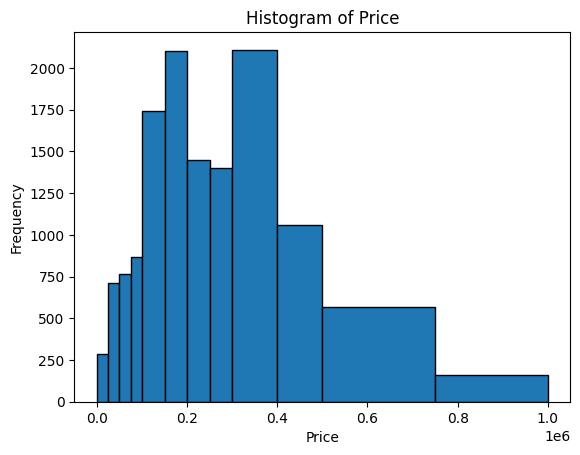

In [24]:
# Plot histogram for price
bins = [0, 25_000, 50_000, 75_000, 100_000, 150_000, 200_000, 250_000, 300_000, 400_000, 500_000, 750_000, 1_000_000]
plt.hist(data['price'], bins=bins, edgecolor='black')
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

The price is definitely right-skewed - we'll handle this later and look at other features now.

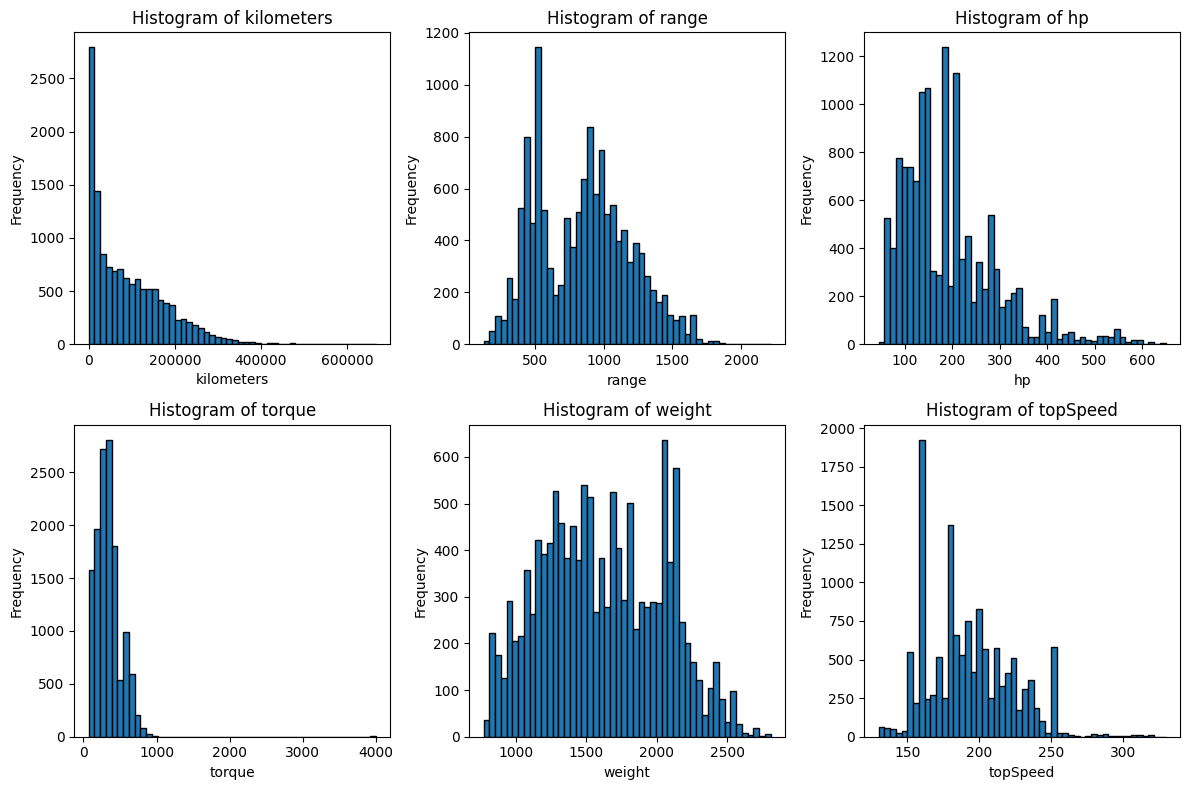

In [25]:
columns_to_plot = ['kilometers', 'range', 'hp', 'torque', 'weight', 'topSpeed']  # Add relevant column names

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    axes[i].hist(data[column], bins=50, edgecolor='black')
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### 3.4.4 Scatter plot

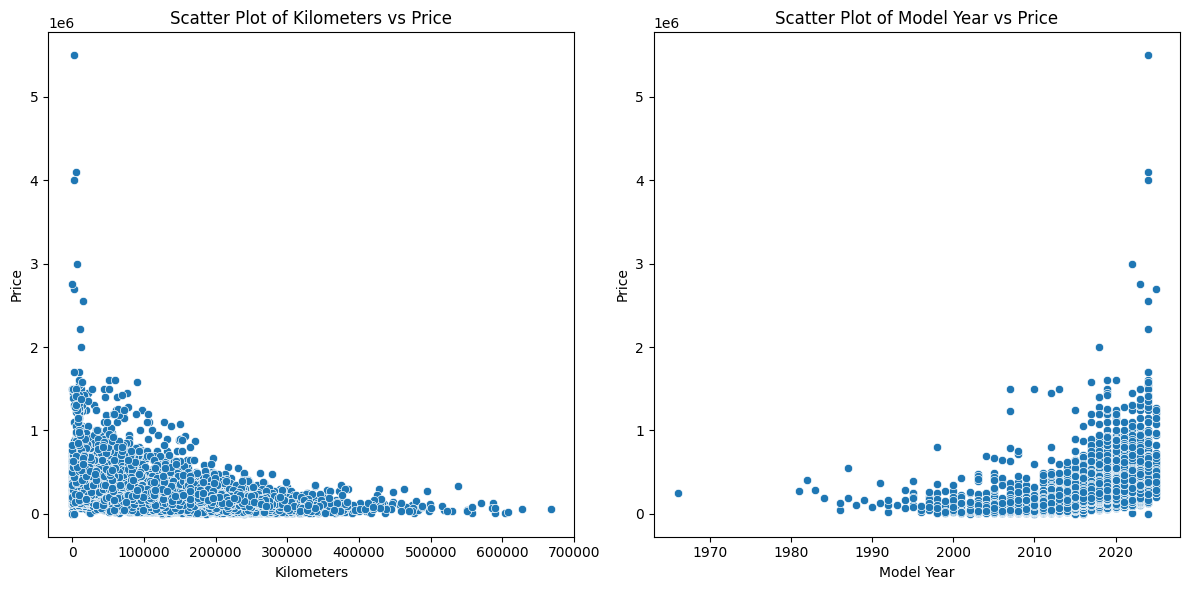

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# First scatter plot (kilometers vs price)
sns.scatterplot(data=data, x='kilometers', y='price', ax=axes[0]) 
axes[0].set_title("Scatter Plot of Kilometers vs Price")
axes[0].set_xlabel("Kilometers")
axes[0].set_ylabel("Price")

# Second scatter plot (age vs price)
sns.scatterplot(data=data, x='modelYear', y='price', ax=axes[1]) 
axes[1].set_title("Scatter Plot of Model Year vs Price")
axes[1].set_xlabel("Model Year")
axes[1].set_ylabel("Price")

plt.tight_layout()
plt.show()

As the mileage of the car increases, the flucuations in price reduce and points remain on the lower part of the y-axis.
Similar trend can be observed in price - modelYear relation: the older the car, the smaller it's price.
It also does not seem as we have any antique and veteran outliers in this dataset.

### 3.5 Correlation matrix

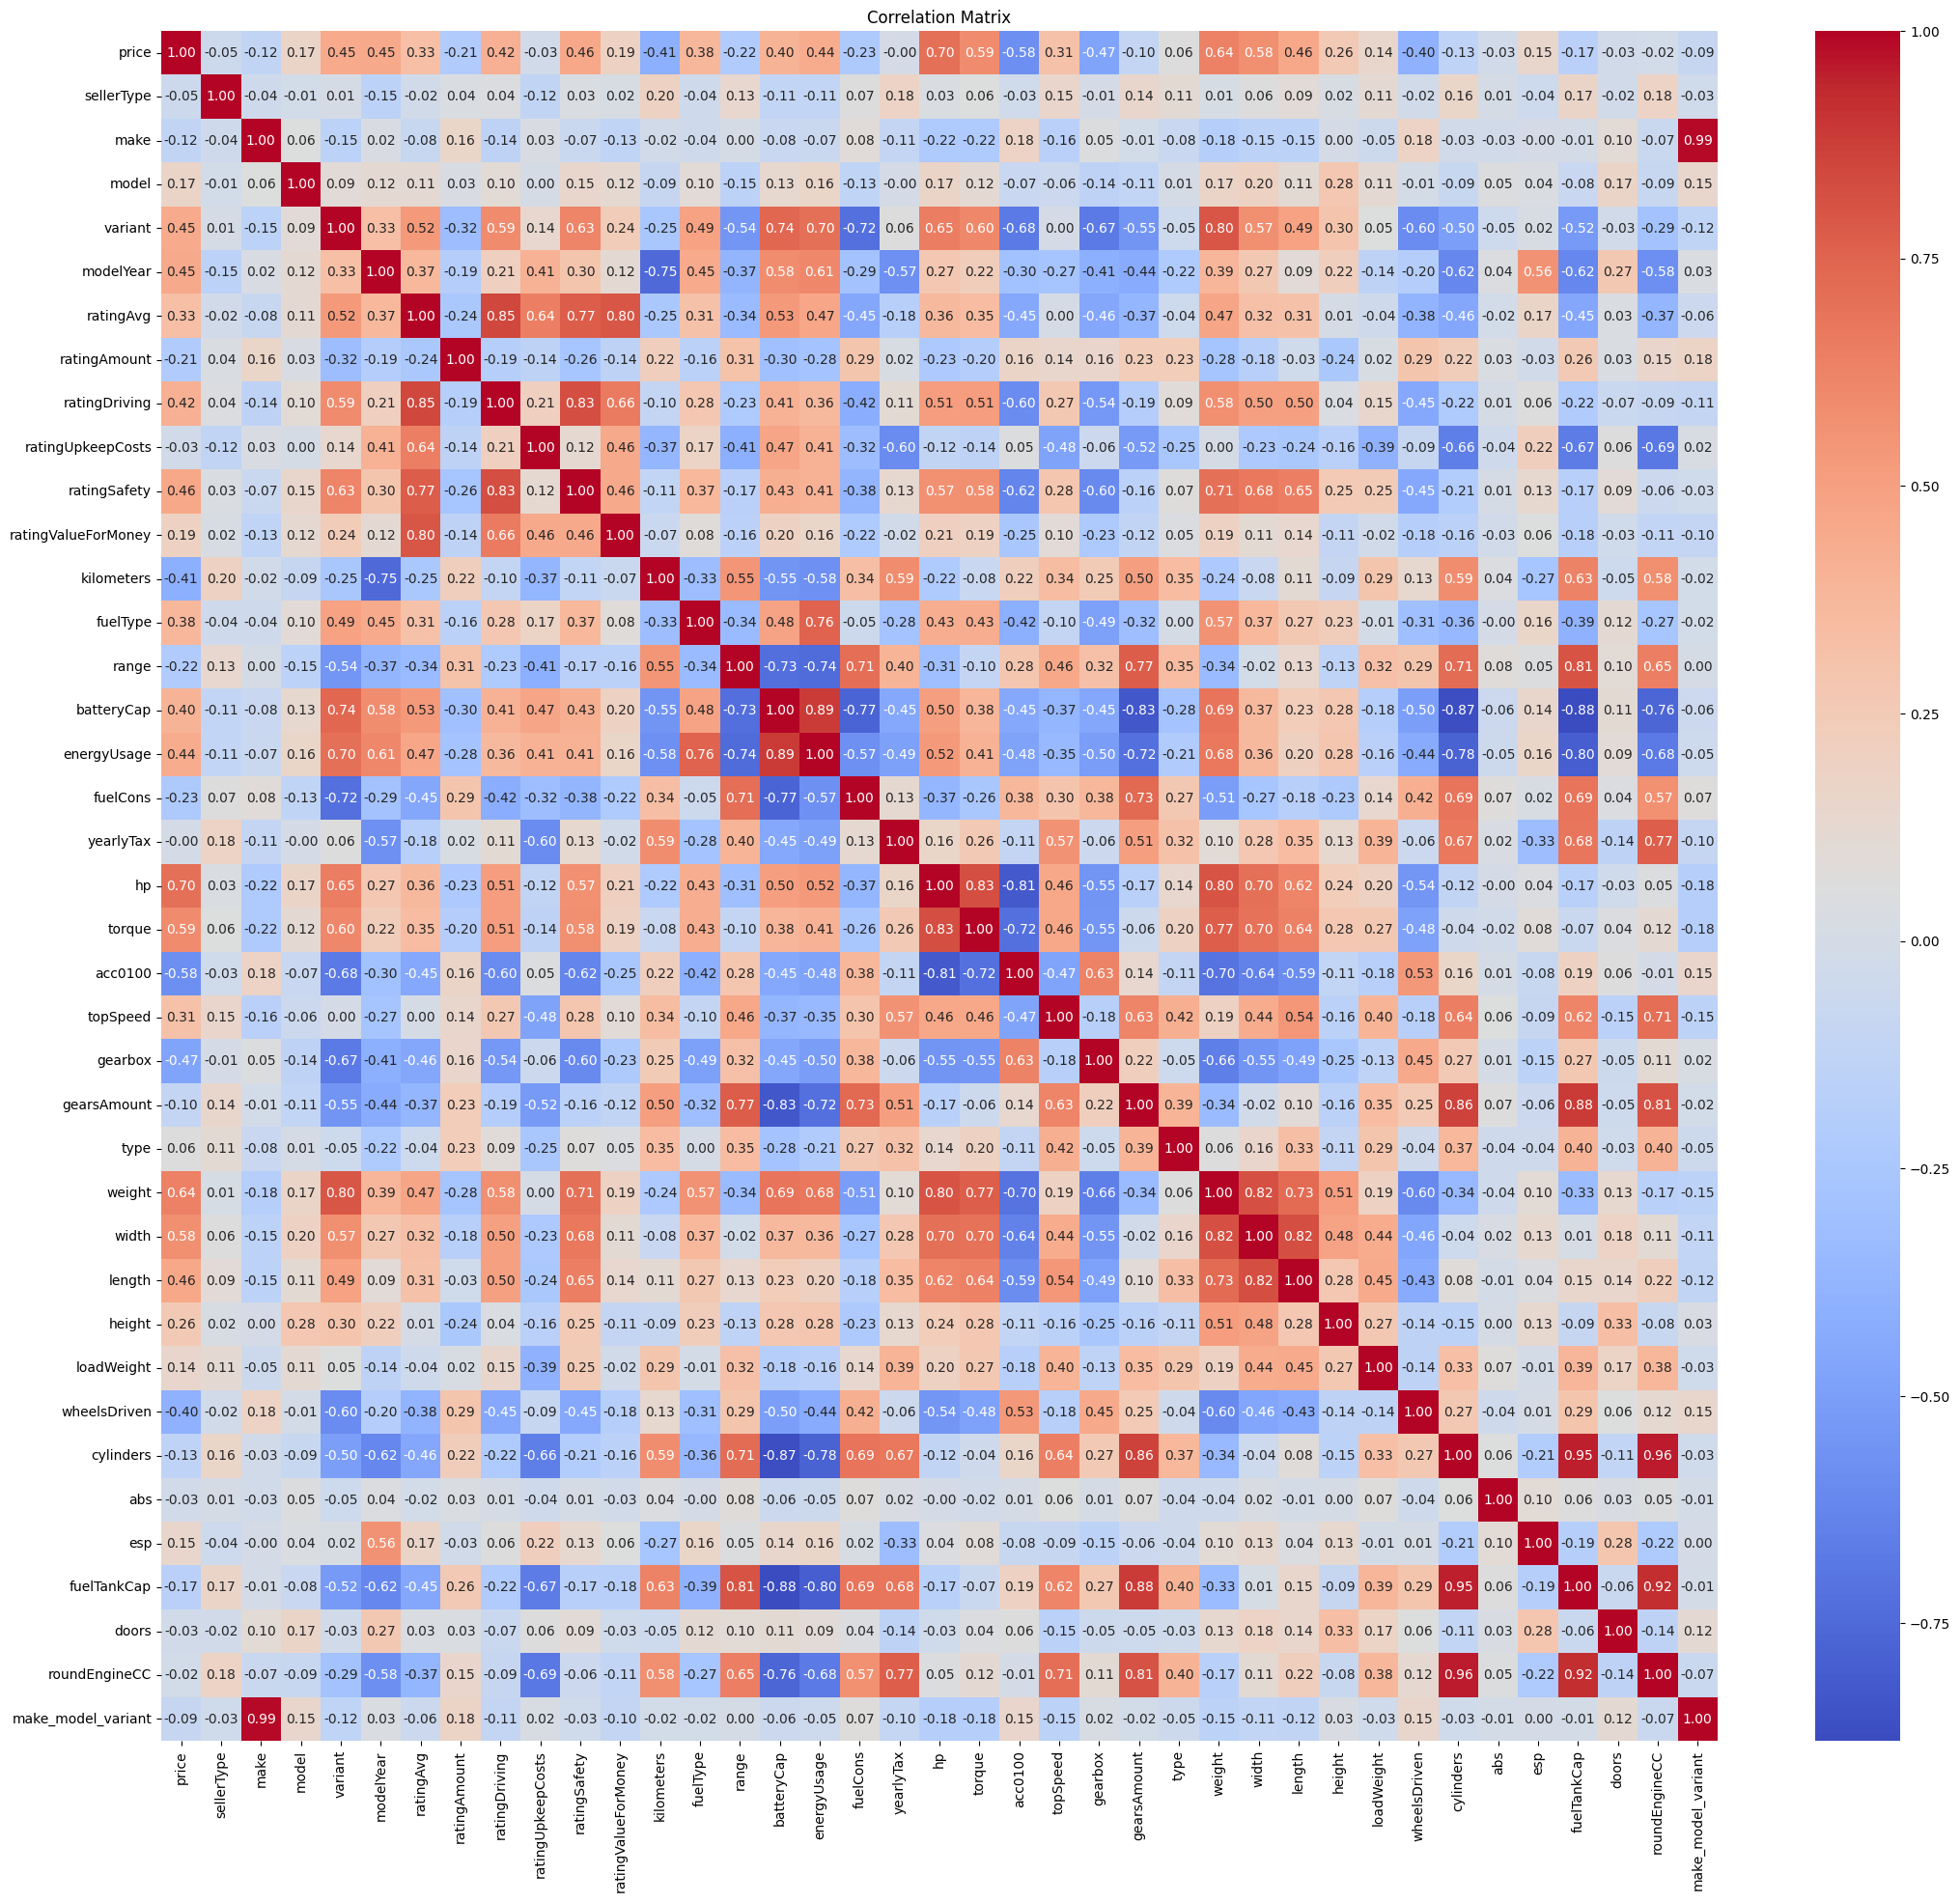

In [27]:
correlation_matrix = data.corr()

plt.figure(figsize=(26, 23))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

We can see some strong relationships in the correlation matrix, some of which will be analysed further below.

#### 3.5.1 Range vs. energyUsage, batteryCap and range vs. fuelCons, fuelTankCap

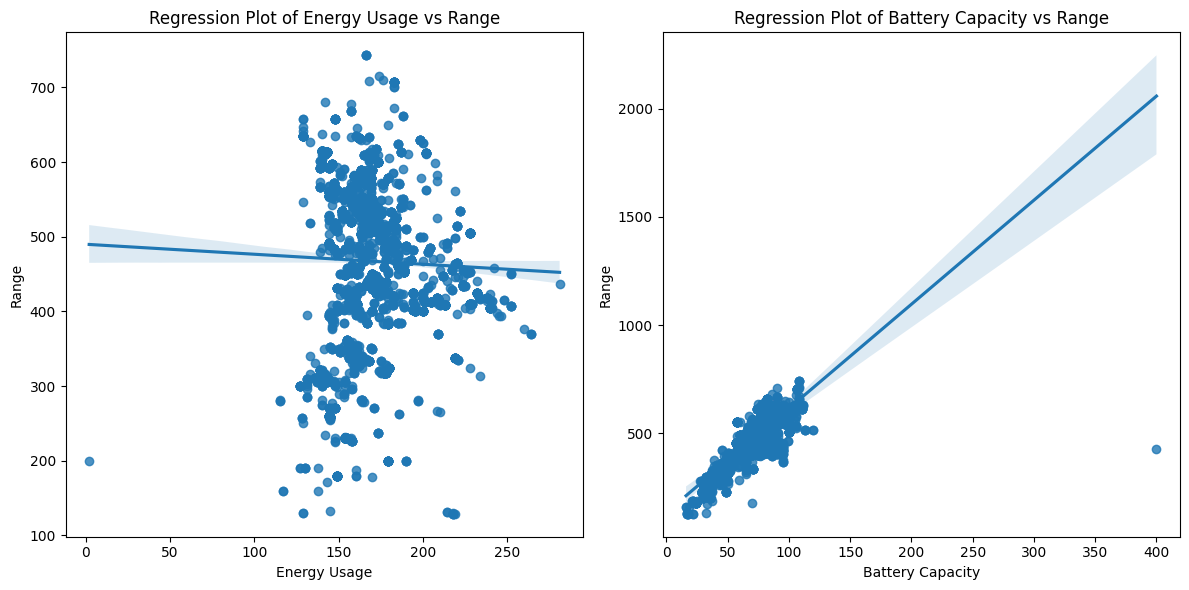

In [28]:
elData = data[(data['fuelType'] == 2)]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.regplot(data=elData, x='energyUsage', y='range', ax=axes[0])
axes[0].set_title("Regression Plot of Energy Usage vs Range")
axes[0].set_xlabel('Energy Usage')
axes[0].set_ylabel('Range')

sns.regplot(data=elData, x='batteryCap', y='range', ax=axes[1])
axes[1].set_title("Regression Plot of Battery Capacity vs Range")
axes[1].set_xlabel('Battery Capacity')
axes[1].set_ylabel('Range')

plt.tight_layout()
plt.show()

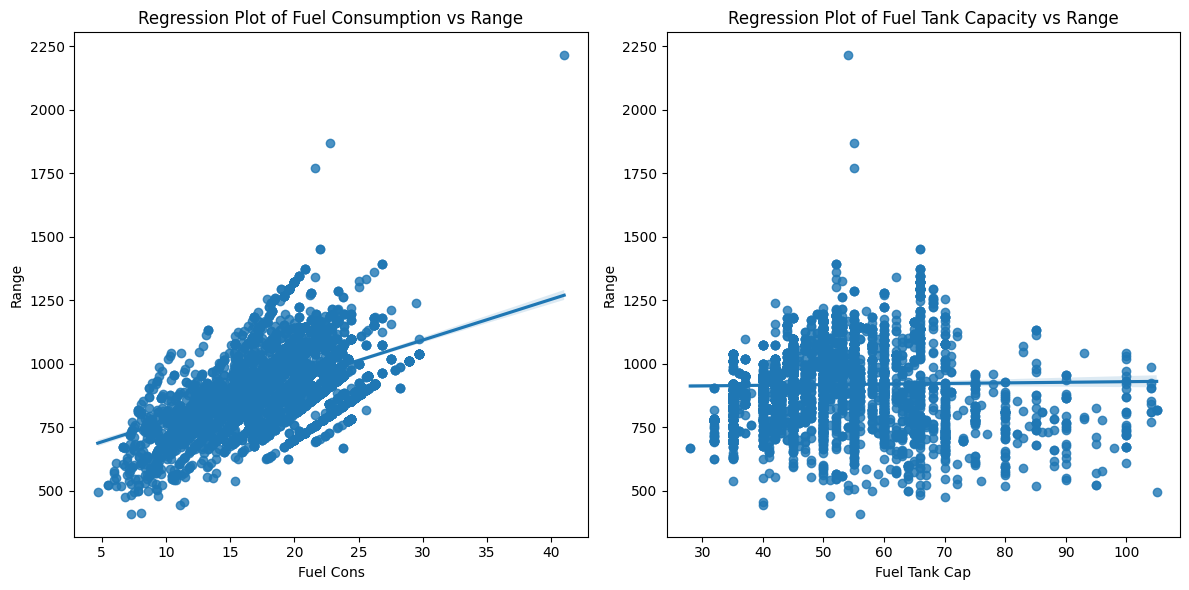

In [29]:
iceData = data[(data['fuelType'] == 0)]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.regplot(data=iceData, x='fuelCons', y='range', ax=axes[0])
axes[0].set_title("Regression Plot of Fuel Consumption vs Range")
axes[0].set_xlabel('Fuel Cons')
axes[0].set_ylabel('Range')

sns.regplot(data=iceData, x='fuelTankCap', y='range', ax=axes[1])
axes[1].set_title("Regression Plot of Fuel Tank Capacity vs Range")
axes[1].set_xlabel('Fuel Tank Cap')
axes[1].set_ylabel('Range')

plt.tight_layout()
plt.show()

It seems that:
- For electric cars, the battery capacity has a clear positive slope and the relationship to range is much stronger than energy usage.
- For ICE cars, the fuel consumption translates to more proprtional increase in range in comparison to fuel tank capacity.

In [30]:
display(data)

price  sellerType  make  model  variant  modelYear  ratingAvg  \
1      375000.0           1    45    381     1640       2024   4.366341   
2      259900.0           0    76    627     5340       2022   4.336538   
3       38000.0           1    26    647      964       2012   3.993825   
7       44800.0           1    59     31      978       2014   4.238463   
8       84500.0           0    36    359     1189       2015   4.331223   
...         ...         ...   ...    ...      ...        ...        ...   
16947  479999.0           0    77    969     3256       2023   4.563180   
16949  189500.0           0    68    900     3557       2017   4.599525   
16951   89900.0           0    62    509     2558       2015   3.970792   
16952  249900.0           0     8    119     3653       2018   4.612502   
16953  289900.0           0    77    969     3002       2019   4.563180   

       ratingAmount  ratingDriving  ratingUpkeepCosts  ratingSafety  \
1             590.0       4.729817           4.019587      4.314875   
2              26.0       4.576923           4.230769      4.500000   
3            1090.0       4.075676           4.193313      3.527372   
7            1088.0       4.140121           4.397044      4.123022   
8             590.0       4.261285           4.234729      4.381993   
...             ...            ...                ...           ...   
16947         455.0       4.642202           4.162826      4.910769   
16949         888.0       4.641243           4.320567      4.762748   
16951         142.0       4.357143           3.264045      4.156425   
16952         999.0       4.825858           4.199867      4.841895   
16953         455.0       4.642202           4.162826      4.910769   

       ratingValueForMoney  kilometers  fuelType   range  batteryCap  \
1                 4.401087        5000         0   808.0         0.0   
2                 4.038462       64000         2   514.0        76.6   
3                 4.178941       87000         0   714.0         0.0   
7                 4.293667       73000         0  1110.0         0.0   
8                 4.446883      121000         0   869.2         0.0   
...                    ...         ...       ...     ...         ...   
16947             4.536923       32000         5   804.8        14.9   
16949             4.673542      197000         1  1432.2         0.0   
16951             4.105556      271000         1  1293.9         0.0   
16952             4.582388      182000         1  1577.4         0.0   
16953             4.536923      116000         1  1309.0         0.0   

       energyUsage  fuelCons  yearlyTax     hp  torque  acc0100  topSpeed  \
1              0.0     20.20     1360.0  136.0   220.0      8.7     205.0   
2            170.0      0.00      780.0  204.0   310.0      8.4     160.0   
3              0.0     20.40      780.0   69.0   102.0     13.1     159.0   
7              0.0     22.20      780.0   82.0   118.0     12.2     175.0   
8              0.0     16.40     2960.0  100.0   137.0     13.5     180.0   
...            ...       ...        ...    ...     ...      ...       ...   
16947        194.0     12.13      780.0  350.0   659.0      5.4     180.0   
16949          0.0     21.70     4640.0  190.0   400.0      7.8     233.0   
16951          0.0     22.70     3620.0  130.0   320.0     10.8     191.0   
16952          0.0     23.90     4200.0  190.0   400.0      7.5     225.0   
16953          0.0     23.80     4200.0  190.0   400.0      7.9     220.0   

       gearbox gearsAmount  type  weight  width  length  height  loadWeight  \
1            0           7     2  1260.0  173.0   386.0   142.0       455.0   
2            0           1     1  2117.0  185.0   460.0   162.0       533.0   
3            1           5     6   840.0  166.0   362.0   150.0       480.0   
7            1           5     4  1168.0  174.0   396.0   146.0       362.0   
8            1           6    10  1368.0  178.0   451.0   149.0       4

### 3.6 Last transformations
After oberving the shape of the data in histograms, we'll apply following tranformations to remedy the right-skew:
- boxcox for the price
- square root skew for the kilometers, horsepower and torque

*The above has been found to be the most effective over iteration of attempts.*

In [31]:
from scipy.stats import boxcox

data_price_t = data.copy()
data_price_t['price'], _ = boxcox(data['price'] + 1)
data_price_t['kilometers'] = np.sqrt(data['kilometers'])
data_price_t['hp'] = np.sqrt(data['hp'])
data_price_t['torque'] = np.sqrt(data['torque'])

In [32]:
invalid_rows = (
    data['range'] == 0
)

rows_with_invalid_data = data[invalid_rows]
rows_with_invalid_data['decoded_mmv'] = le_makeModelVar.inverse_transform(rows_with_invalid_data['make_model_variant'].values) # To get better understanding as to why there are NaNs

display(rows_with_invalid_data)

Empty DataFrame
Columns: [price, sellerType, make, model, variant, modelYear, ratingAvg, ratingAmount, ratingDriving, ratingUpkeepCosts, ratingSafety, ratingValueForMoney, kilometers, fuelType, range, batteryCap, energyUsage, fuelCons, yearlyTax, hp, torque, acc0100, topSpeed, gearbox, gearsAmount, type, weight, width, length, height, loadWeight, wheelsDriven, cylinders, abs, esp, fuelTankCap, doors, roundEngineCC, make_model_variant, decoded_mmv]
Index: []

# 5. Short-list promising models

#### Quick and dirty training of various models for comparison

Lets prepare some splits and features so the following test on linear models will be measurable</br>
Our goal will be to compare different linear regression models on predicting the price of the car based on many different features</br>
After that Gaussian Naive Bayes will be introduced to counter this comparison with non-linear approach of the supposedly linear problem</br>

In [33]:
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

features = data_price_t[['hp', 'torque', 'fuelType', 'type', 'weight', 'topSpeed', 'kilometers', 'modelYear']]
labels = data_price_t['price']

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.4, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

mse_lin = mean_squared_error(Y_test, Y_pred)
r2_lin = r2_score(Y_test, Y_pred)

print("Mean squared error: %.2f" % mse_lin)
print("Coefficient of determination: %.2f" % r2_lin)
print("Accuracy score: {}".format(regr.score(X_test, Y_test)))

Mean squared error: 81.54
Coefficient of determination: 0.83
Accuracy score: 0.8264260444067324


In [35]:
# from sklearn.model_selection import train_test_split # type: ignore
# from sklearn.preprocessing import StandardScaler # type: ignore

# data

# features = data[['hp', 'torque', 'fuelType', 'type', 'weight', 'topSpeed']]
# labels = data['price']

# X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.4, shuffle=True, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#### 5.1.1 Linear Regression

In [36]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

mse_lin = mean_squared_error(Y_test, Y_pred)
r2_lin = r2_score(Y_test, Y_pred)

print("Mean squared error: %.2f" % mse_lin)
print("Coefficient of determination: %.2f" % r2_lin)
print("Accuracy score: {}".format(regr.score(X_test, Y_test)))

residuals_linear_regression = Y_test - Y_pred



Mean squared error: 81.54
Coefficient of determination: 0.83
Accuracy score: 0.8264260444067324


#### 5.1.2 Ridge

In [37]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

alpha_range = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv_model = RidgeCV(alphas=alpha_range, cv=5, scoring='neg_mean_squared_error')
ridge_cv_model.fit(X_train, Y_train)

best_alpha = ridge_cv_model.alpha_
print("Best alpha value:", best_alpha)

Y_pred_ridge = ridge_cv_model.predict(X_test)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

print("Ridge Regression Mean squared error: %.2f" % mse_ridge)
print("Ridge Regression Coefficient of determination: %.2f" % r2_ridge)
print("Accuracy score: {}".format(regr.score(X_test, Y_test)))

Best alpha value: 10.0
Ridge Regression Mean squared error: 81.54
Ridge Regression Coefficient of determination: 0.83
Accuracy score: 0.8264260444067324


#### 5.1.3 Lasso

In [38]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

lasso_cv_model = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5, random_state=42)
lasso_cv_model.fit(X_train, Y_train)

best_alpha = lasso_cv_model.alpha_
print("Best alpha value:", best_alpha)

Y_pred_lasso = lasso_cv_model.predict(X_test)
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)

print("Lasso Regression Mean squared error: %.2f" % mse_lasso)
print("Lasso Regression Coefficient of determination: %.2f" % r2_lasso)
print("Accuracy score: {}".format(regr.score(X_test, Y_test)))

Best alpha value: 0.01
Lasso Regression Mean squared error: 81.56
Lasso Regression Coefficient of determination: 0.83
Accuracy score: 0.8264260444067324


The general conlusion after 3-4 iterations of adjusting parameters, linear models, unfortunately do quite poorly.</br>
Those considerably bad results - all models scored around ~47%</br>
However this changed after examining data skewedness and applying the best possible transformation on each feature.</br>
By utilizing PowerTransformer with method 'yeo-johnson' we have applied following transformations on the features:</br>
<b>Following transformations are direct answers to right side data skewedness.</b></br>
-boxcox on price</br>
-sqrt on kilometers</br>
-sqrt on hp</br>
-and sqrt on torque</br>
This basically is the best possible combination (changing anything will result in significant drop in the performance) scoring ~83% accuracy, even outperforming the first iteration of Gaussian Naive Bayes.</br>

#### 5.1.4 Gaussian Naive Bayes

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

data
data_price_t = data.copy()

pt = PowerTransformer(method='yeo-johnson')
data_price_t = data.copy()
data_price_t['price'], _ = boxcox(data['price'] + 1)
data_price_t['kilometers'] = np.sqrt(data['kilometers'])
data_price_t['hp'] = np.sqrt(data['hp'])
data_price_t['torque'] = np.sqrt(data['torque'])

def prepare_price(price):
    if price < 20000:
        return 'low'
    elif 20000 <= price < 50000:
        return 'medium'
    else:
        return 'high'

data_price_t['price_category'] = data_price_t['price'].apply(prepare_price)

X = data_price_t[['hp', 'torque', 'fuelType', 'type', 'weight', 'topSpeed', 'kilometers', 'modelYear']]
y = data_price_t['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

Model Accuracy: 1.00


As expected, Gaussian Naive Bayes outscored linear models due to non-linear approach that GaussianNB executes. (however not that much)</br>
Due to this fact, this model can potentially find (and found) more dependences that is otherwise 'invisible' for linear models.</br>
The first iteration of GaussianNB scored around 64%. By just adding more relevant features it went up to 89%.</br>
As an experiment, we have also applied all the neccessary tranformation for GaussianNB, as a result it has closed the counter with 1.00 accuracy.</br>

#### 5.1.5 Finding knee for clustering analysis
For the next models, we will go through DBSCAN, and clustering analysis.</br>
The fact that we have domain knowledge at our disposal we will be able to identify principal components used in dimensionality reduction.</br>
Additionally, we do hope to confirm our decision handling outliers with fiding potential noise using DBSCAN.</br>
But first, let's find optimal number of clusters for our analysis.(also we will have an indicator because everyone see Knee in different places)</br>

price  sellerType  make  model  variant  modelYear  ratingAvg  \
1      375000.0           1    45    381     1640       2024   4.366341   
2      259900.0           0    76    627     5340       2022   4.336538   
3       38000.0           1    26    647      964       2012   3.993825   
7       44800.0           1    59     31      978       2014   4.238463   
8       84500.0           0    36    359     1189       2015   4.331223   
...         ...         ...   ...    ...      ...        ...        ...   
16947  479999.0           0    77    969     3256       2023   4.563180   
16949  189500.0           0    68    900     3557       2017   4.599525   
16951   89900.0           0    62    509     2558       2015   3.970792   
16952  249900.0           0     8    119     3653       2018   4.612502   
16953  289900.0           0    77    969     3002       2019   4.563180   

       ratingAmount  ratingDriving  ratingUpkeepCosts  ratingSafety  \
1             590.0       4.729817           4.019587      4.314875   
2              26.0       4.576923           4.230769      4.500000   
3            1090.0       4.075676           4.193313      3.527372   
7            1088.0       4.140121           4.397044      4.123022   
8             590.0       4.261285           4.234729      4.381993   
...             ...            ...                ...           ...   
16947         455.0       4.642202           4.162826      4.910769   
16949         888.0       4.641243           4.320567      4.762748   
16951         142.0       4.357143           3.264045      4.156425   
16952         999.0       4.825858           4.199867      4.841895   
16953         455.0       4.642202           4.162826      4.910769   

       ratingValueForMoney  kilometers  fuelType   range  batteryCap  \
1                 4.401087        5000         0   808.0         0.0   
2                 4.038462       64000         2   514.0        76.6   
3                 4.178941       87000         0   714.0         0.0   
7                 4.293667       73000         0  1110.0         0.0   
8                 4.446883      121000         0   869.2         0.0   
...                    ...         ...       ...     ...         ...   
16947             4.536923       32000         5   804.8        14.9   
16949             4.673542      197000         1  1432.2         0.0   
16951             4.105556      271000         1  1293.9         0.0   
16952             4.582388      182000         1  1577.4         0.0   
16953             4.536923      116000         1  1309.0         0.0   

       energyUsage  fuelCons  yearlyTax     hp  torque  acc0100  topSpeed  \
1              0.0     20.20     1360.0  136.0   220.0      8.7     205.0   
2            170.0      0.00      780.0  204.0   310.0      8.4     160.0   
3              0.0     20.40      780.0   69.0   102.0     13.1     159.0   
7              0.0     22.20      780.0   82.0   118.0     12.2     175.0   
8              0.0     16.40     2960.0  100.0   137.0     13.5     180.0   
...            ...       ...        ...    ...     ...      ...       ...   
16947        194.0     12.13      780.0  350.0   659.0      5.4     180.0   
16949          0.0     21.70     4640.0  190.0   400.0      7.8     233.0   
16951          0.0     22.70     3620.0  130.0   320.0     10.8     191.0   
16952          0.0     23.90     4200.0  190.0   400.0      7.5     225.0   
16953          0.0     23.80     4200.0  190.0   400.0      7.9     220.0   

       gearbox gearsAmount  type  weight  width  length  height  loadWeight  \
1            0           7     2  1260.0  173.0   386.0   142.0       455.0   
2            0           1     1  2117.0  185.0   460.0   162.0       533.0   
3            1           5     6   840.0  166.0   362.0   150.0       480.0   
7            1           5     4  1168.0  174.0   396.0   146.0       362.0   
8            1           6    10  1368.0  178.0   451.0   149.0       4

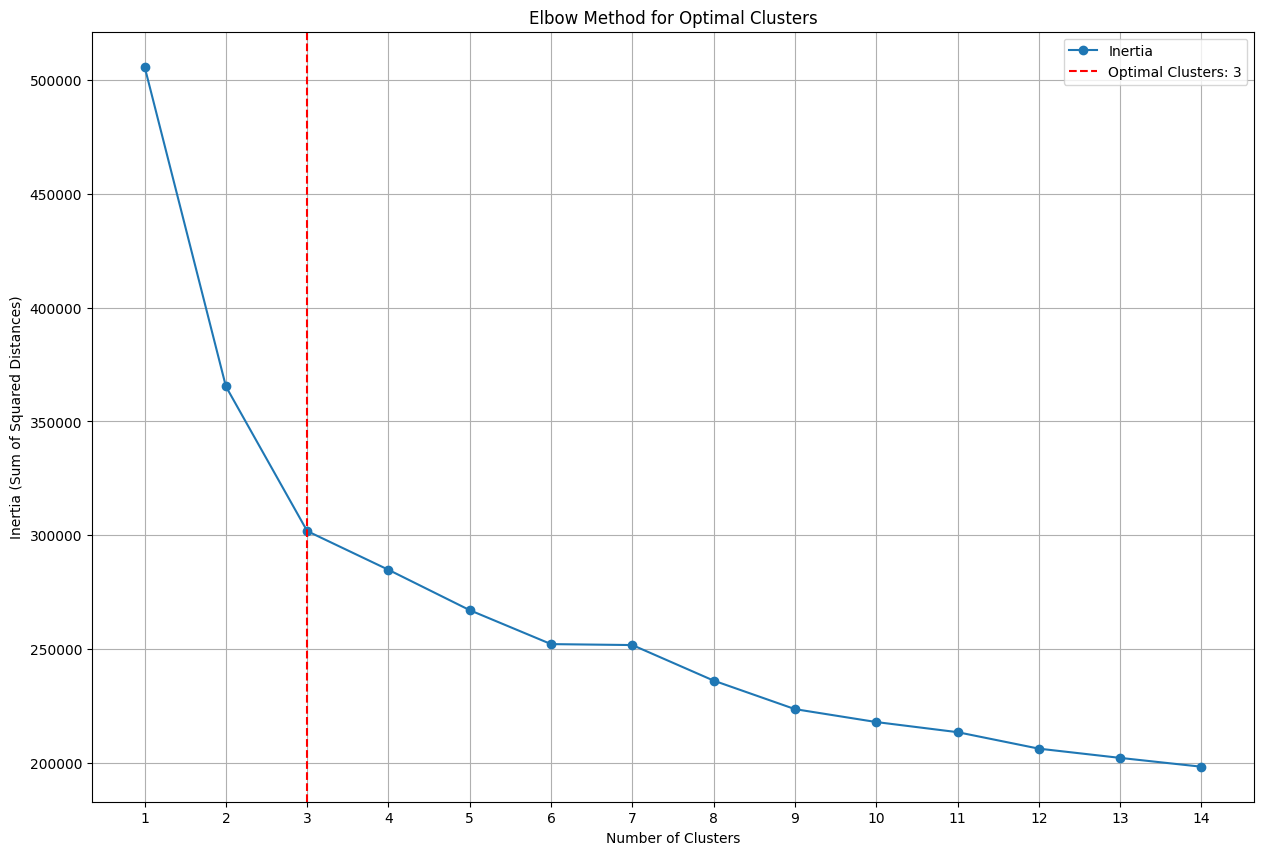

The optimal number of clusters is: 3


price  sellerType  make  model  variant  modelYear  ratingAvg  \
1      375000.0           1    45    381     1640       2024   4.366341   
2      259900.0           0    76    627     5340       2022   4.336538   
3       38000.0           1    26    647      964       2012   3.993825   
7       44800.0           1    59     31      978       2014   4.238463   
8       84500.0           0    36    359     1189       2015   4.331223   
...         ...         ...   ...    ...      ...        ...        ...   
16947  479999.0           0    77    969     3256       2023   4.563180   
16949  189500.0           0    68    900     3557       2017   4.599525   
16951   89900.0           0    62    509     2558       2015   3.970792   
16952  249900.0           0     8    119     3653       2018   4.612502   
16953  289900.0           0    77    969     3002       2019   4.563180   

       ratingAmount  ratingDriving  ratingUpkeepCosts  ratingSafety  \
1             590.0       4.729817           4.019587      4.314875   
2              26.0       4.576923           4.230769      4.500000   
3            1090.0       4.075676           4.193313      3.527372   
7            1088.0       4.140121           4.397044      4.123022   
8             590.0       4.261285           4.234729      4.381993   
...             ...            ...                ...           ...   
16947         455.0       4.642202           4.162826      4.910769   
16949         888.0       4.641243           4.320567      4.762748   
16951         142.0       4.357143           3.264045      4.156425   
16952         999.0       4.825858           4.199867      4.841895   
16953         455.0       4.642202           4.162826      4.910769   

       ratingValueForMoney  kilometers  fuelType   range  batteryCap  \
1                 4.401087        5000         0   808.0         0.0   
2                 4.038462       64000         2   514.0        76.6   
3                 4.178941       87000         0   714.0         0.0   
7                 4.293667       73000         0  1110.0         0.0   
8                 4.446883      121000         0   869.2         0.0   
...                    ...         ...       ...     ...         ...   
16947             4.536923       32000         5   804.8        14.9   
16949             4.673542      197000         1  1432.2         0.0   
16951             4.105556      271000         1  1293.9         0.0   
16952             4.582388      182000         1  1577.4         0.0   
16953             4.536923      116000         1  1309.0         0.0   

       energyUsage  fuelCons  yearlyTax     hp  torque  acc0100  topSpeed  \
1              0.0     20.20     1360.0  136.0   220.0      8.7     205.0   
2            170.0      0.00      780.0  204.0   310.0      8.4     160.0   
3              0.0     20.40      780.0   69.0   102.0     13.1     159.0   
7              0.0     22.20      780.0   82.0   118.0     12.2     175.0   
8              0.0     16.40     2960.0  100.0   137.0     13.5     180.0   
...            ...       ...        ...    ...     ...      ...       ...   
16947        194.0     12.13      780.0  350.0   659.0      5.4     180.0   
16949          0.0     21.70     4640.0  190.0   400.0      7.8     233.0   
16951          0.0     22.70     3620.0  130.0   320.0     10.8     191.0   
16952          0.0     23.90     4200.0  190.0   400.0      7.5     225.0   
16953          0.0     23.80     4200.0  190.0   400.0      7.9     220.0   

       gearbox gearsAmount  type  weight  width  length  height  loadWeight  \
1            0           7     2  1260.0  173.0   386.0   142.0       455.0   
2            0           1     1  2117.0  185.0   460.0   162.0       533.0   
3            1           5     6   840.0  166.0   362.0   150.0       480.0   
7            1           5     4  1168.0  174.0   396.0   146.0       362.0   
8            1           6    10  1368.0  178.0   451.0   149.0       4

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

display(data)

numeric_data = data.copy()
numeric_data = numeric_data.drop(['make_model_variant'], axis=1)

#strategy='constant', fill_value=0
# imputer = SimpleImputer(strategy='mean')
# numeric_data_imputed = imputer.fit_transform(numeric_data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

inertia = []
cluster_range = range(1, 15)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

knee_locator = KneeLocator(cluster_range, inertia, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

plt.figure(figsize=(15, 10))
plt.plot(cluster_range, inertia, marker='o', label='Inertia')
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(cluster_range)
plt.legend()
plt.grid()
plt.show()

print(f"The optimal number of clusters is: {optimal_clusters}")
display(data)


#### 5.1.6 Clustering analysis PCA

Total number of data points: 13310


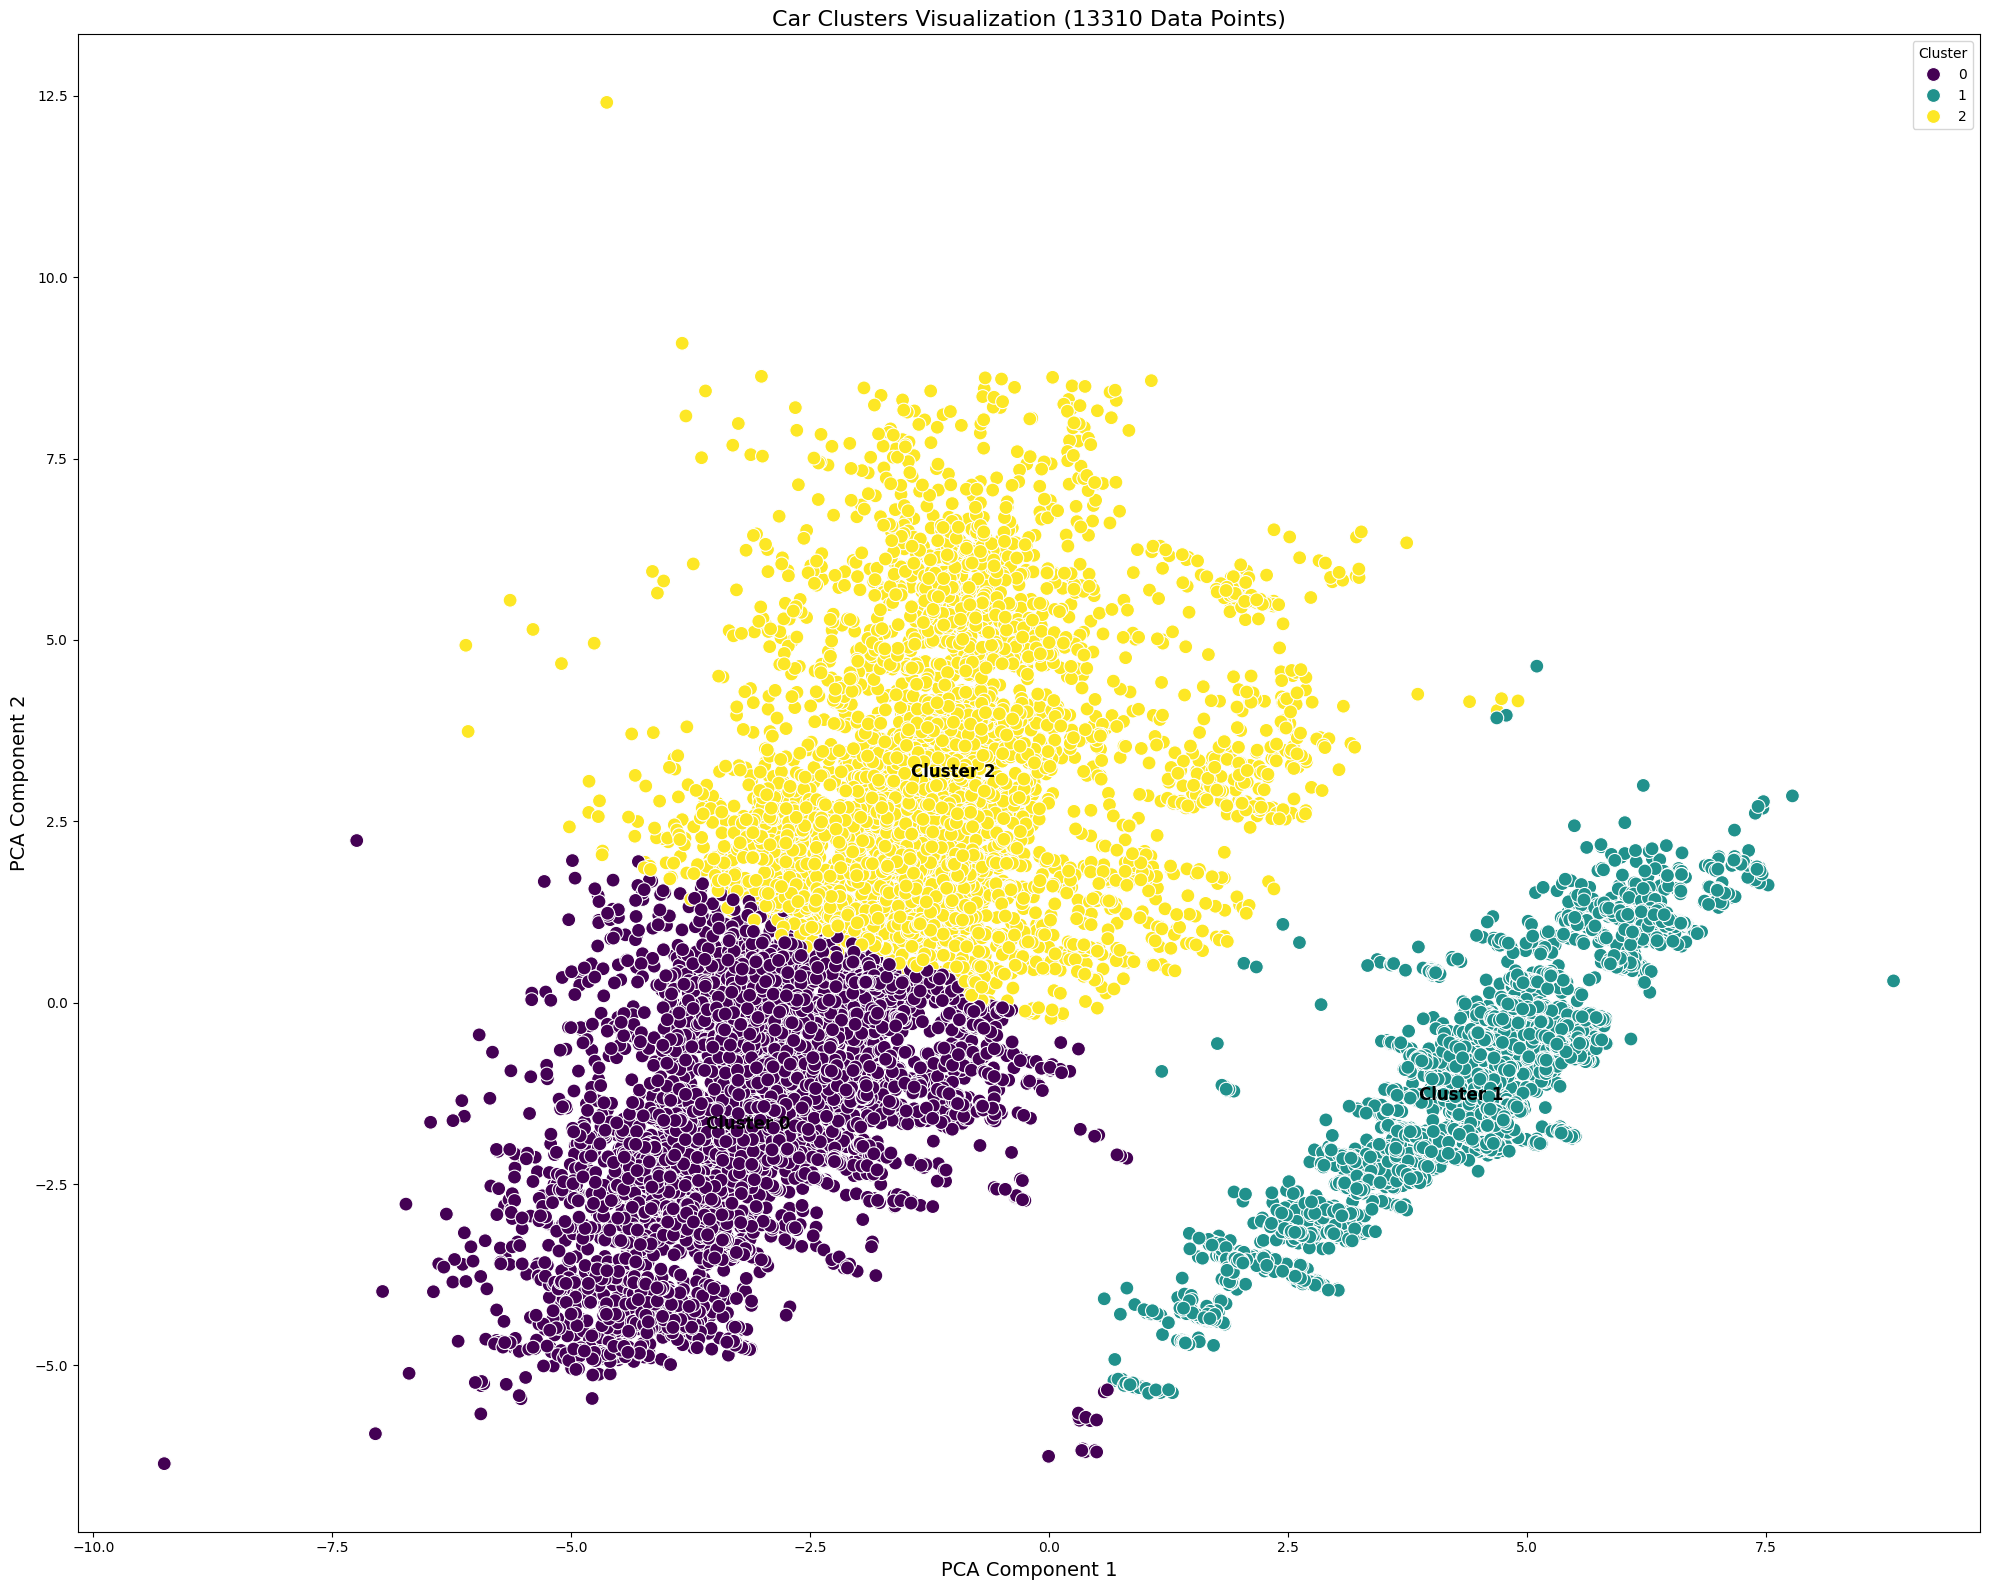

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

pt = PowerTransformer(method='yeo-johnson')
data_price_t = data.copy()
data_price_t['price'], _ = boxcox(data['price'] + 1)  #np.log(data['price'])
data_price_t['kilometers'] = np.sqrt(data['kilometers'])
data_price_t['hp'] = np.sqrt(data['hp'])
data_price_t['torque'] = np.sqrt(data['torque'])

numeric_data = data_price_t
numeric_data = numeric_data.drop(['make', 'model', 'variant'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

kmeans = KMeans(n_clusters=3, random_state=42)
numeric_data['Cluster'] = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
numeric_data['PCA1'] = pca_components[:, 0]
numeric_data['PCA2'] = pca_components[:, 1]


# Count total number of data points
total_data_points = numeric_data.shape[0]
print(f"Total number of data points: {total_data_points}")

plt.figure(figsize=(20, 16))
sns.scatterplot(data=numeric_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)

for cluster_num in numeric_data['Cluster'].unique():
    cluster_center = numeric_data[numeric_data['Cluster'] == cluster_num][['PCA1', 'PCA2']].mean()
    plt.text(cluster_center['PCA1'], cluster_center['PCA2'], f"Cluster {cluster_num}", 
             fontsize=12, weight='bold', color='black', ha='center', va='center')

plt.title(f'Car Clusters Visualization ({total_data_points} Data Points)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

silhouette_avg = silhouette_score(scaled_data, numeric_data['Cluster'])

#### Components
- PCA Component 1 - range of the car
- PCA Component 2 - fuel/energy usage

#### Clusters
- Cluster 1 - ICE-powered cars
- Cluster 2 - Electric cars
- Cluster 3 - Hybrid cars, both plug-in and regular

#### 5.1.7 DBSCAN

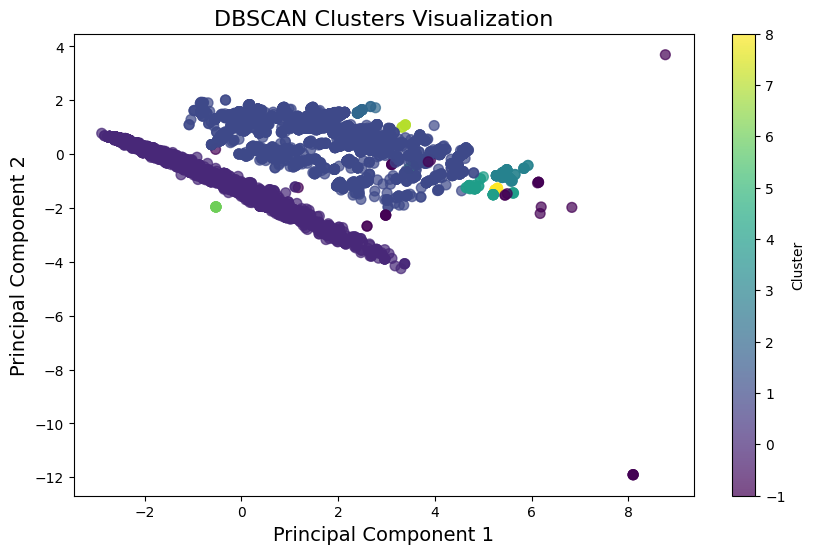

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = data

relevant_features = ['hp', 'torque', 'weight', 'batteryCap', 'energyUsage']
data_DBSCAN = df[relevant_features]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_DBSCAN)

eps = 0.7  
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(scaled_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clusters Visualization', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.colorbar(label='Cluster')
plt.show()

#### 5.1.8 Decision Tree

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
import numpy as np

pt = PowerTransformer(method='yeo-johnson')
data_price_t = data.copy()
data_price_t['price'], _ = boxcox(data['price'] + 1)
data_price_t['kilometers'] = np.sqrt(data['kilometers'])
data_price_t['hp'] = np.sqrt(data['hp'])
data_price_t['torque'] = np.sqrt(data['torque'])

response_columns = data_price_t.columns
X = data_price_t[response_columns]
y = data_price_t['make_model_variant'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
clf = DecisionTreeClassifier(
    random_state=42,
    criterion='entropy',
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=2
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

conf_matrix_decision_tree = confusion_matrix(y_test, y_pred, labels=clf.classes_)

Model Accuracy: 0.65


## 5.4 Type of errors analysis

#### 5.4.1 Linear regression residuals ####


Let's dive into explaining the type of errors and where the model is struggling:</br>
Model accuracy: ~84%</br>
-Residual mean ~= 0 => it is an indicator that the model is not overestimating or underestimating its' predictions systematically.</br>
<b>Positive residual</b> would mean model making predictions too low<br>
<b>Negative residual</b> would mean model making predictions too high<br>
-Standard deviation os Residuals (std) = 9.03 => it indicates that the model's errors are relatively small and well distributed:</br>
Example: if the actual price would be 100, 9.03 std would mean that the models prediction would be in between 91 and 109.</br>
The top5% table means to highlight where the model made largest mistakes.</br>
The key information here is that if we check ID's of the specific cars on which the model struggle, we found out that those are super cars, with extraordinary price and conditions and it is understandable (as the sample of such super cars is much lower) that the model is struggling in this area.</br>



Residual Summary Statistics:
            Actual    Predicted    Residuals
count  5324.000000  5324.000000  5324.000000
mean    100.785870   100.782450     0.003420
std      21.676733    19.527082     9.031005
min      28.194157    23.713258   -77.420507
25%      87.511882    87.978869    -4.662920
50%     101.475882   101.432219    -0.202556
75%     115.341647   114.911406     4.344361
max     233.874664   164.354303    82.900268



Cases with largest errors (top 5%):
           Actual   Predicted  Residuals
15165  149.095472  127.752043  21.343429
12479  118.225914  145.524718 -27.298804
4318   179.837575  146.194366  33.643209
3163   125.114435  101.060071  24.054365
898     51.432523   73.966431 -22.533908
...           ...         ...        ...
4698   119.145320   90.039105  29.106215
15298  142.612827  111.763579  30.849248
1298    70.901488   89.713205 -18.811718
2556   114.844221  136.236414 -21.392193
15169  150.608581  118.765945  31.842636

[267 rows x 3 columns]


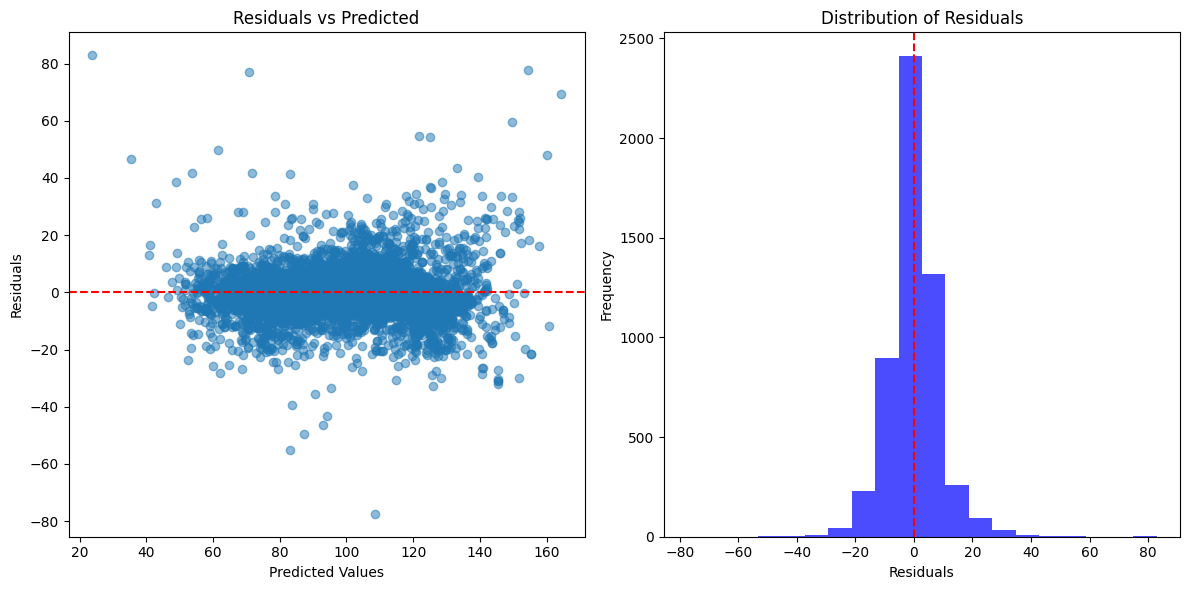

In [44]:
residuals_summary = pd.DataFrame({
    "Actual": Y_test,
    "Predicted": Y_pred,
    "Residuals": residuals_linear_regression
})
print("\nResidual Summary Statistics:")
print(residuals_summary.describe())

threshold = np.percentile(abs(residuals_linear_regression), 95)  
large_error_cases = residuals_summary[abs(residuals_linear_regression) > threshold]
print("\nCases with largest errors (top 5%):")
print(large_error_cases)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_pred, residuals_linear_regression, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.hist(residuals_linear_regression, bins=20, color='blue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [45]:
df_error_analysis = data.copy()
df_error_analysis['mmv_decoded'] = le_makeModelVar.inverse_transform(df_error_analysis['make_model_variant'].values)
display(df_error_analysis.loc[15169])

price                                                           849900.0
sellerType                                                             0
make                                                                  77
model                                                               1004
variant                                                             3275
modelYear                                                           2023
ratingAvg                                                        4.35254
ratingAmount                                                       367.0
ratingDriving                                                       4.65
ratingUpkeepCosts                                               3.405745
ratingSafety                                                    4.928187
ratingValueForMoney                                              4.42623
kilometers                                                         60000
fuelType                                           

#### 5.4.2 Silhouette Score for Clustering Analysis

The silhouette score is measuring how well each data point is assigned in the cluster copmared to other clusters</br>
- 1: points are very well clustered, they clusters are far from each other</br>
- 0: points lies exactly on the line between two clusters</br>
- -1: points are poorly clustered (overlapping), with the data points being closer to neighbouring clusters than its own cluster</br>
The formula for that is: <b>S=b-a/max(a,b)</b></br>
Where:</br>
a - average distance between points within the same cluster</br>
b - average distance between points in relation to the nearest neighbouring cluster</br>
Score of 0.29 may indicate:</br>
- the clusters slightly overlapping each other</br>
- some data points may be too close to the neighbouring cluster to be able to assign them with high confidence to one or another</br>
- it may suggest that this is not optimal clustering structure, <b>however</b> due to having sufficient domain knowledge we are quite satisfied with that results.</br>
- additionally, presence of outliers, and noise (some of it we managed to observe using KMEANS) may affect the silhouette score</br>


In [46]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

print(f"Silhouette Score: {silhouette_avg:.2f}")

silhouette_values = silhouette_samples(scaled_data, numeric_data['Cluster'])

numeric_data['Silhouette_Score'] = silhouette_values

print("\nSilhouette Score Summary:")
print(numeric_data.groupby('Cluster')['Silhouette_Score'].mean())
print(f"\nOverall Silhouette Score: {silhouette_avg:.2f}")

low_silhouette_points = numeric_data[numeric_data['Silhouette_Score'] < 0]
print("\nPotential Misclustered Points (Silhouette Score < 0):")
print(low_silhouette_points.head(5))

Silhouette Score: 0.29

Silhouette Score Summary:
Cluster
0    0.634370
1    0.428884
2    0.084428
Name: Silhouette_Score, dtype: float64

Overall Silhouette Score: 0.29

Potential Misclustered Points (Silhouette Score < 0):
         price  sellerType  modelYear  ratingAvg  ratingAmount  ratingDriving  \
15  109.883994           0       2021   4.298040         148.0       4.536290   
25  100.007169           0       2017   4.355479        3457.0       4.538008   
28   95.539889           0       2020   4.495272        3868.0       4.480913   
29  108.286175           0       2019   4.455556          30.0       4.711111   
31   86.413405           0       2013   4.337895         535.0       4.586527   

    ratingUpkeepCosts  ratingSafety  ratingValueForMoney  kilometers  \
15           3.753036      4.668016             4.234818  324.037035   
25           3.941235      4.619283             4.323389  434.741302   
28           4.379698      4.515269             4.605208  354.964787   

#### 5.4.3 Confusion Matrix for Naive Bayes

Confusion Matrix:
[[3993    0    0]
 [   0    0    0]
 [   0    0    0]]


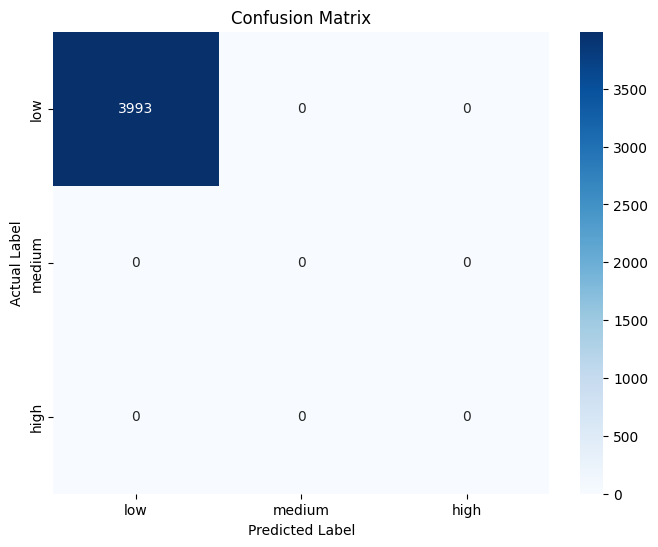

In [47]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

The confusion matrix was also quite confusing for us.</br>
We can derive following information from it, apparently 1.0 accuracy in the Naive Bayes comes from:</br>
- the model predicts 'low' price for every single test instance, regardless what is the actual class</br>
- the model seems to completely ignore 'medium' and 'high' most likely due to not learning how to distinguis them</br>
- although in the final iteration it has achieved '100%' of accuracy it is evident that it fails to caputure other types of "price"</br>
Possible causes of such effect:</br>
- since our dataset might me imbalanced (too much cars has 'low' price), this can lead GaussianNB to learn to always predict dominant case to minize errors</br>
Therefore it is possible to explain what is the reason of 100% accuracy on the last iteration of GaussianNB</br>
The solution to this could be to revert back to the previous iteration where the model had around 86%, meaning it was likely able to identify all cases.</br>

## Summary, final conclusions and discussion

In general, we took iterative approach for this assignment (both for exploring the data and training various machine learning models)</br>
This may have resulted in too many iterations sometimes, however with each new discovery or tweak, we were getting new iterations for the same model which usually resulted in its increased performance or new problem requiring fixing (GaussianNB case)</br>
We would like to gather here all relevant information regarding iterations, so we can later proceed with choosing the most promising models.</br>
Our main goal was to analyze the car's market focusing on predicting the price based on identified features and grouping cars into distinct categories. (with our key machine learning models being regression approach and clustering analysis)</br>
<b>Linear regression:</b></br>
For linear regression we have simultanously trained 3 different models (Linear Regression, Ridge, Lasso), however as we expected they scored very closely, if not the same, compared to each other</br>
Ultimately, those 3 models had 4 generations/iterations each.</br>
-1: The first iteration was done ad hoc to gain general overview of the accuracy and possible problems ahead</br>
With little to no tuning the model did poorly (below 50%)
-2,3: In the next iteration, our main goal was to find the best features that will have strongest correlation with price. This process have taken two iterations, and we have tried various methods of veryfing our approach that did not end up in the final version of the assignment.</br>
-4: After applying transformations to the data (namely boxcox on price and sqrt on the features) we created the last iteration for mentioned models resulting in outstanding increase in the performance.</br>
Since all the preparations on the data were already finished at that point with the performance around 84% and satisfactory explanation of the errors that the model is making, we view it as the last iteration for linear regression as well as our best model.</br>

<b>Gaussian Naive Bayes:</b></br>
As a counter and a sort of experiment, we have trained GaussianNB that ended up having 3 iterations.</br>
In the previous assignments, whenever there was space for it, we were training GaussianNB as a way to check the limitations of the linear approach, as well as to see how non-linear model works with linear problems.</br>
However the results, and also errors that the model did were surprising and we were completely not expecting them:</br>
-1: The first iteration (~64% of accuracy), outperformed first two iterations of linear regression (and it was definitely to bew expected). However it is important to mention that this generation of GaussianNB lost, in terms of results, with definitive version of Linear Regression (that ultimately went up to around 83%)</br>
-2: With more information about the data, namely choosing more features to add in the model, without any other changes the model went up to 89%.</br>
-3: Given the iterative approach, the 3rd generation of GaussianNB was prepared alongside 4th iteration of linear regression. With the same changes applied (data transformations), the model outdid itself ending up with 100% accuracy.</br>
We have examined the last iteration using confusion matrix, and it turned the model was not able to recognize 'price' other than of type 'low'.</br>
We have also found out that in order to avoid errors, GaussianNB will try to fit everything into dominating trend, completely omitting other cases.</br>
With this explanation we deem last iteration of the GaussianNB a failure but a very interesting case to display overtuning the model.</br>

<b>Clustering analysis</b></br>
We decided to go with K-Nearest-Neighbours and DBSCAN since we have seen a lot of potential in those two approaches.
The idea was to identify distinct groups within the car market, and using our domain knowledge identify, with high probability, what are the two most important features on X and Y axis.</br>
DBSCAN's main purpose was to identify noise in the data, clusters and their distribution.</br>
We did not use an iterative approach for clustering analysis but rather adjusting the code based on our needs and changes in the data so we are not able to draw a line which version correspond to which iteration of the proccess.</br>
We have started with finding the best number of clusters for our data using Knee Locator.</br>
After identifying that best number of clusters is 3 we did KMeans on 3 clusters and we believe to succesfully identified X and Y axis.</br>

#### Results ####

We have met our primary goal of predicting the price in 84% - the model our choice and also first highlighted model is Linear Regression</br>

Our secondary goal of dividing the cars into categories using dimentionality reduction was achieved using K Nearest Neighbours.</br>
Despite that we see room for improvement in the clustering section, potentially dividing the data differently or into more categories</br>

Although the 3rd iteration of GaussianNB was a failure, the previous iteration was quite promising and we are satisfied with it.</br>

It would be also good idea to explore Tree models more, we have but one Decision Tree model (2 iterations) and what we could do better is to shift our efforts onto Tree models more.</br>
Another step that could potentially be advantageous for our project is to source even more data and train another iterations of the models.</br>
Ultimately, this was a challenging project pushing us to analyze the situation from all possible angles and utilize as much of knowledge and models that were presented to us during our course.</br>
We do believe that we managed to meat both project's and learning objective however there is still room for improvements.</br>

#### Link to the video presentation ####
https://viaucdk-my.sharepoint.com/:v:/g/personal/315168_viauc_dk/Ebdi79U8CoZKsaWOh4LPyB0BruogiuuGIjlkGNvYpwAYxg?e=zOx1aJ